In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from pinns import *

In [2]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
dev_str = f"{device.type}:{device.index}"

## Brusselator PDEs

> The Brusselator PDEs for two species are
<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + A - (B+1)u + u^2v$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + Bu - u^2 v$</center></h3>

for diffusion constants $D_u$, $D_v$, and model parameters $A, B > 0$.
Therefore, the kinetic terms are

<h3><center>$f(u,v) = A - (B+1)u + u^2v$</center></h3>
<h3><center>$g(u,v) = Bu - u^2 v$</center></h3>

<h3><center>$u^* = A$</center></h3>
<h3><center>$v^* = \frac{B}{A}$</center></h3>



In [3]:
def plot_n_im(arrays, titles=None, add_colorbar=True, figsize=(12, 8), fraction=0.15, shrink=1.0):
    cols = len(arrays)
    if titles is not None:
        assert len(titles) == cols, f"Titles len'{len(titles)}' is not equal to arrays '{col}'."
    plt.figure(figsize=figsize)
    for i in range(cols):
        ax = plt.subplot(1, cols, i+1)
        if titles is not None:
            ax.set_title(titles[i])
        img = plt.imshow(arrays[i])
        if add_colorbar:
            plt.colorbar(img, fraction=fraction, shrink=shrink)


Epoch: 1
loss boundary: 0.003043, loss physics: 86.535271, loss laplacian: 2.000000,  loss initial condition: 19.887897
Laplacian U: 0.000000, Laplacian V: 0.000000


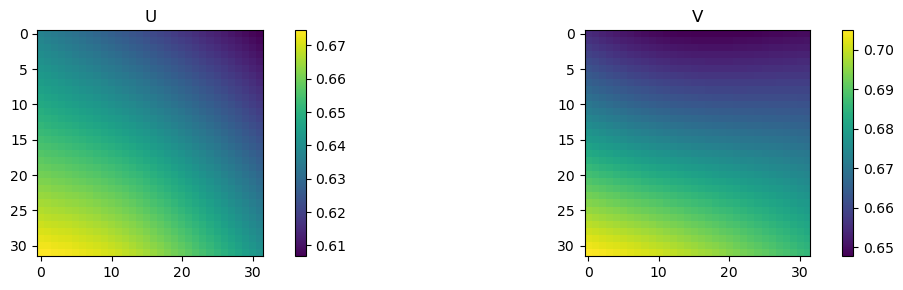

Epoch: 500
loss boundary: 0.003582, loss physics: 276.058411, loss laplacian: 2.000000,  loss initial condition: 0.046765
Laplacian U: 0.000300, Laplacian V: 0.000115


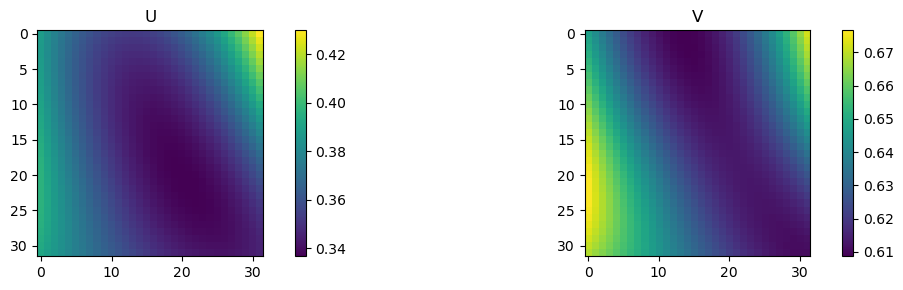

Epoch: 1000
loss boundary: 0.005085, loss physics: 176.294418, loss laplacian: 2.000000,  loss initial condition: 0.041044
Laplacian U: 0.000233, Laplacian V: 0.000096


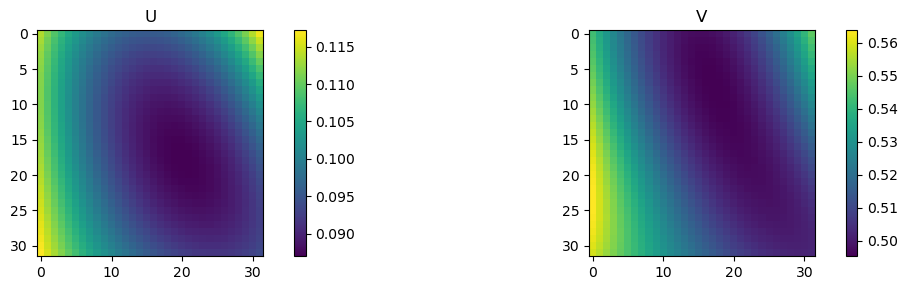

Epoch: 1500
loss boundary: 0.002904, loss physics: 107.500229, loss laplacian: 2.000000,  loss initial condition: 0.037386
Laplacian U: 0.000171, Laplacian V: 0.000097


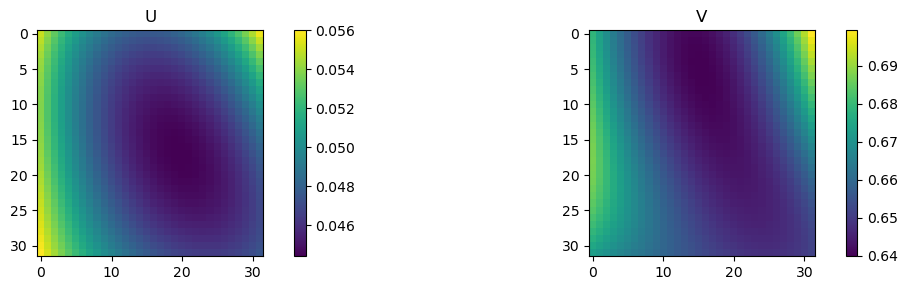

Epoch: 2000
loss boundary: 0.002007, loss physics: 63.788189, loss laplacian: 2.000000,  loss initial condition: 0.035387
Laplacian U: 0.000122, Laplacian V: 0.000101


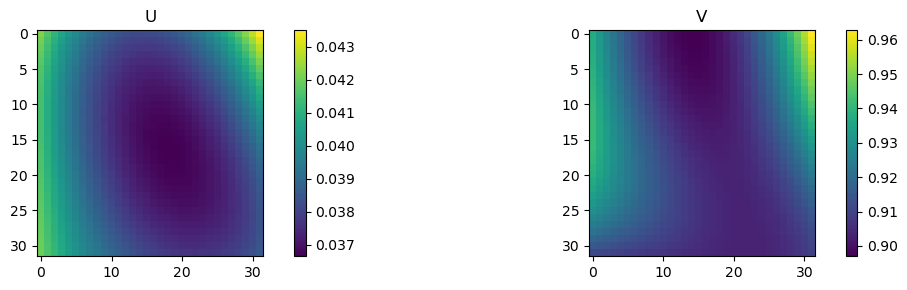

Epoch: 2500
loss boundary: 0.001513, loss physics: 42.336189, loss laplacian: 2.000000,  loss initial condition: 0.034101
Laplacian U: 0.000092, Laplacian V: 0.000104


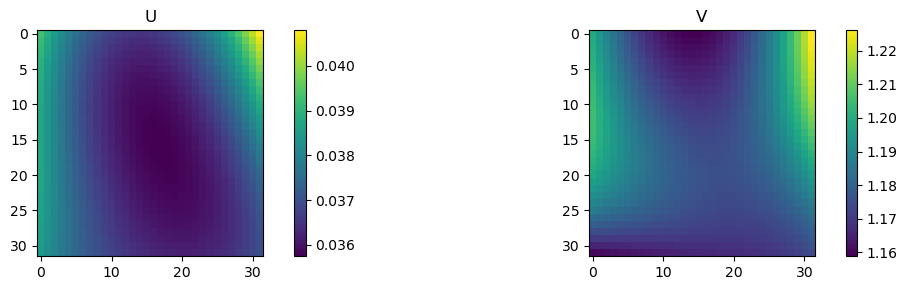

Epoch: 3000
loss boundary: 0.001155, loss physics: 32.969910, loss laplacian: 2.000000,  loss initial condition: 0.033248
Laplacian U: 0.000073, Laplacian V: 0.000110


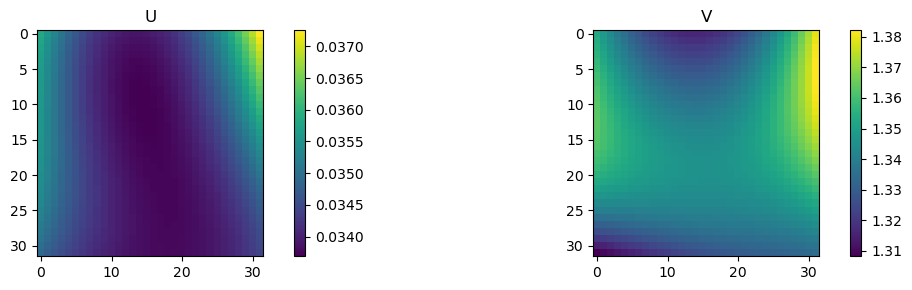

Epoch: 3500
loss boundary: 0.000877, loss physics: 27.320158, loss laplacian: 2.000000,  loss initial condition: 0.032441
Laplacian U: 0.000061, Laplacian V: 0.000121


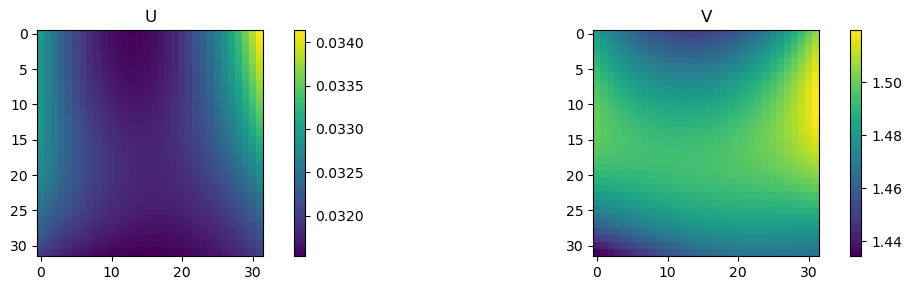

Epoch: 4000
loss boundary: 0.000666, loss physics: 23.174475, loss laplacian: 2.000000,  loss initial condition: 0.031730
Laplacian U: 0.000052, Laplacian V: 0.000135


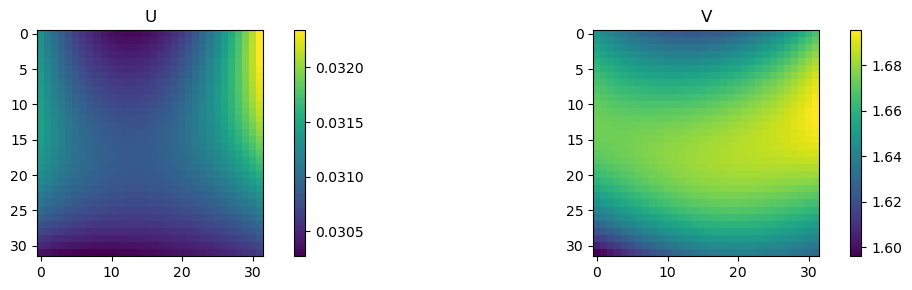

Epoch: 4500
loss boundary: 0.000517, loss physics: 19.777758, loss laplacian: 2.000000,  loss initial condition: 0.031143
Laplacian U: 0.000047, Laplacian V: 0.000155


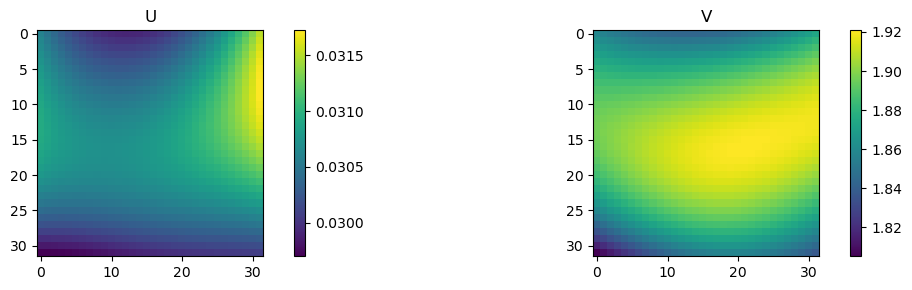

Epoch: 5000
loss boundary: 0.000421, loss physics: 17.053593, loss laplacian: 2.000000,  loss initial condition: 0.030674
Laplacian U: 0.000044, Laplacian V: 0.000181


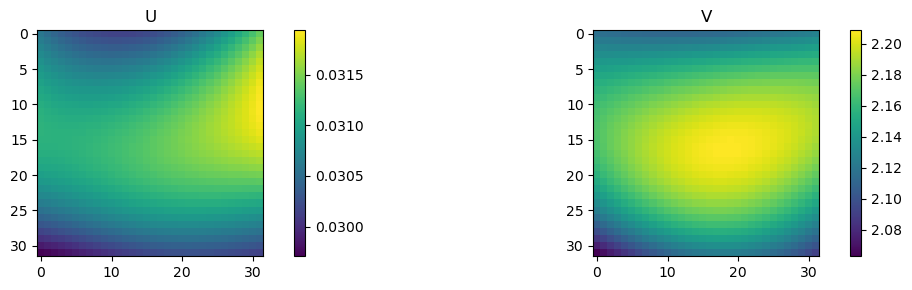

Epoch: 5500
loss boundary: 0.000368, loss physics: 15.145242, loss laplacian: 2.000000,  loss initial condition: 0.030118
Laplacian U: 0.000039, Laplacian V: 0.000223


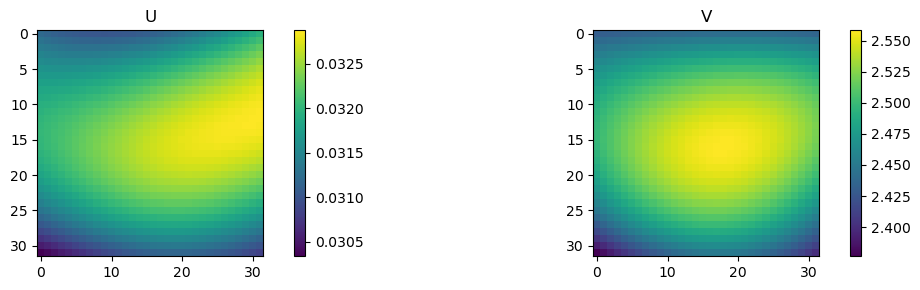

Epoch: 6000
loss boundary: 0.000357, loss physics: 13.278949, loss laplacian: 2.000000,  loss initial condition: 0.029271
Laplacian U: 0.000038, Laplacian V: 0.000295


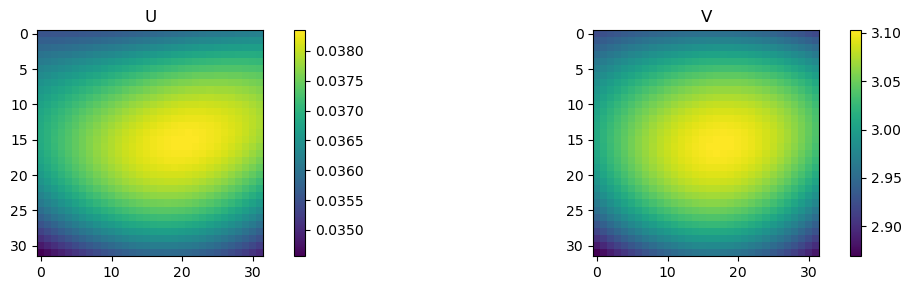

Epoch: 6500
loss boundary: 0.000364, loss physics: 10.882515, loss laplacian: 2.000000,  loss initial condition: 0.028318
Laplacian U: 0.000048, Laplacian V: 0.000399


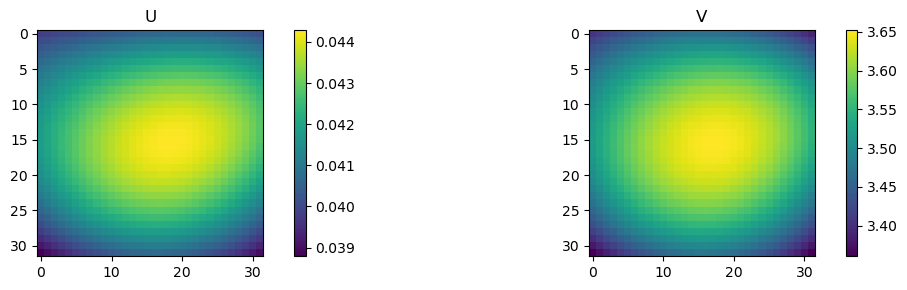

Epoch: 7000
loss boundary: 0.000466, loss physics: 9.554663, loss laplacian: 2.000000,  loss initial condition: 0.027298
Laplacian U: 0.000060, Laplacian V: 0.000559


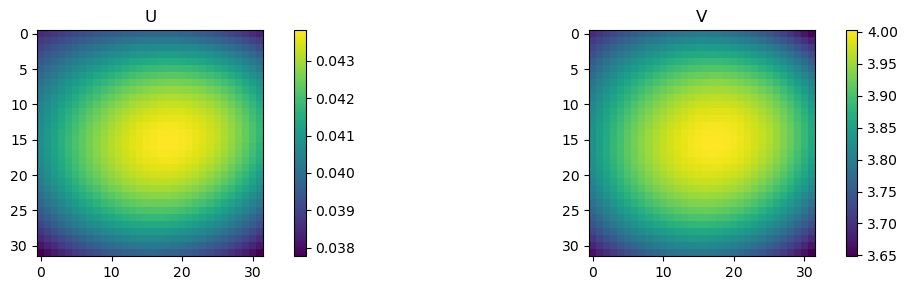

Epoch: 7500
loss boundary: 0.000834, loss physics: 8.380376, loss laplacian: 1.999999,  loss initial condition: 0.026178
Laplacian U: 0.000102, Laplacian V: 0.000790


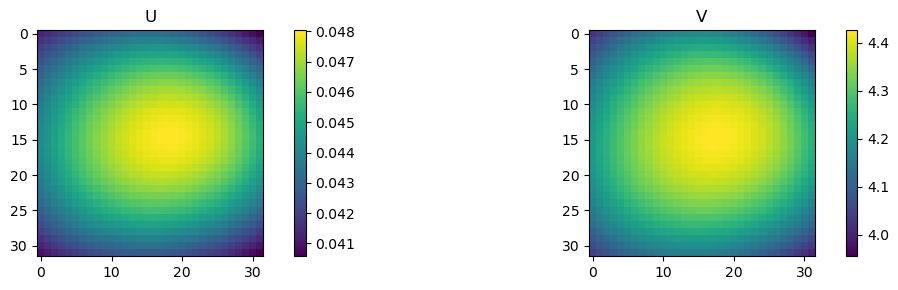

Epoch: 8000
loss boundary: 0.001348, loss physics: 7.374068, loss laplacian: 1.999998,  loss initial condition: 0.024640
Laplacian U: 0.000254, Laplacian V: 0.001295


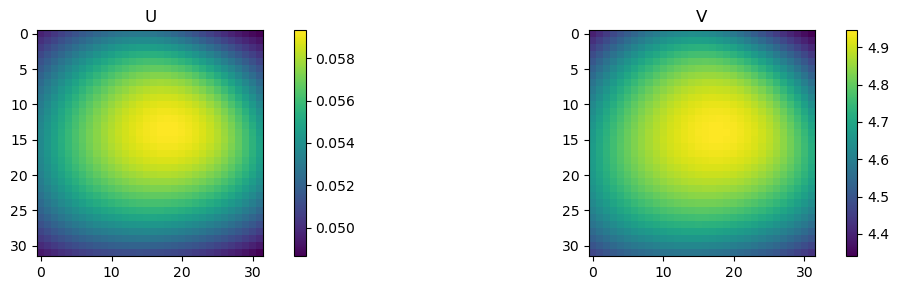

Epoch: 8500
loss boundary: 0.001285, loss physics: 6.546186, loss laplacian: 1.999996,  loss initial condition: 0.022221
Laplacian U: 0.000937, Laplacian V: 0.002657


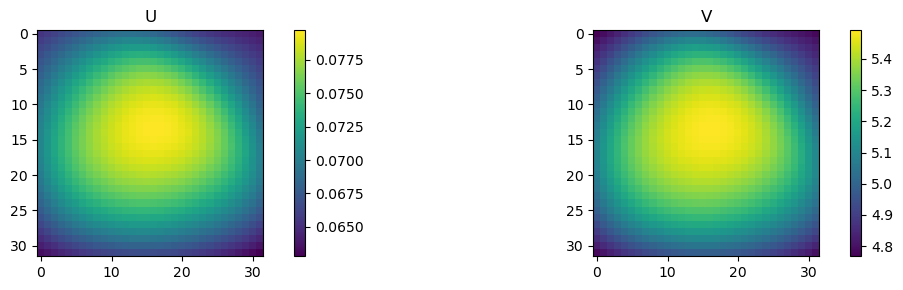

Epoch: 9000
loss boundary: 0.001527, loss physics: 5.910356, loss laplacian: 1.999990,  loss initial condition: 0.018868
Laplacian U: 0.003588, Laplacian V: 0.006058


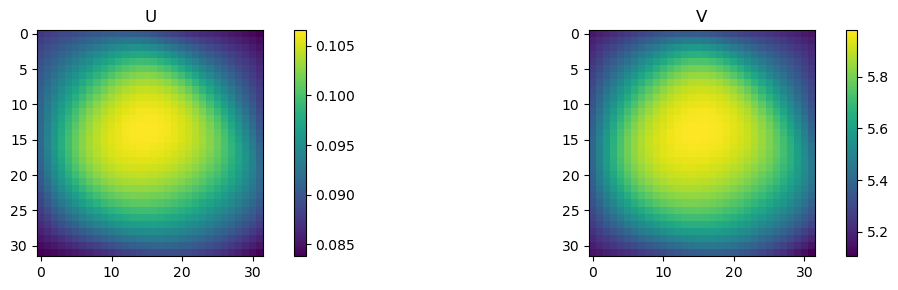

Epoch: 9500
loss boundary: 0.001670, loss physics: 5.525012, loss laplacian: 1.999975,  loss initial condition: 0.014649
Laplacian U: 0.010800, Laplacian V: 0.013943


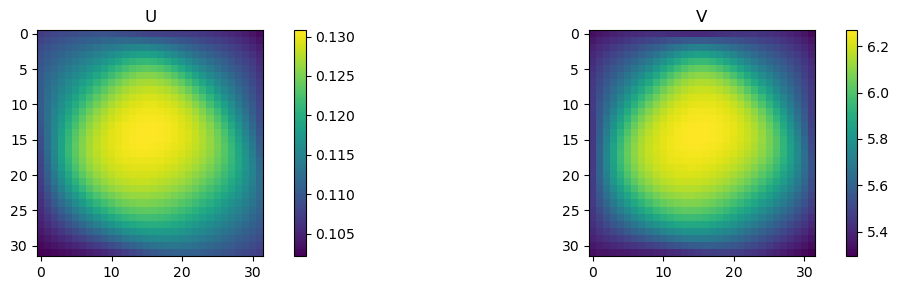

Epoch: 10000
loss boundary: 0.002312, loss physics: 5.355188, loss laplacian: 1.999937,  loss initial condition: 0.009615
Laplacian U: 0.028480, Laplacian V: 0.034298


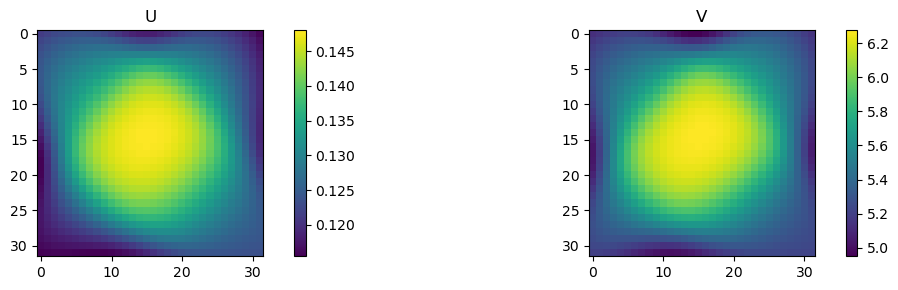

Epoch: 10500
loss boundary: 0.002061, loss physics: 5.212791, loss laplacian: 1.999858,  loss initial condition: 0.005448
Laplacian U: 0.064222, Laplacian V: 0.077574


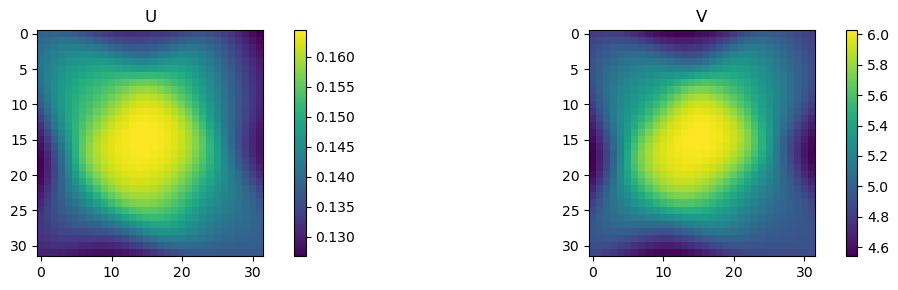

Epoch: 11000
loss boundary: 0.000994, loss physics: 5.082982, loss laplacian: 1.999727,  loss initial condition: 0.002901
Laplacian U: 0.119884, Laplacian V: 0.153388


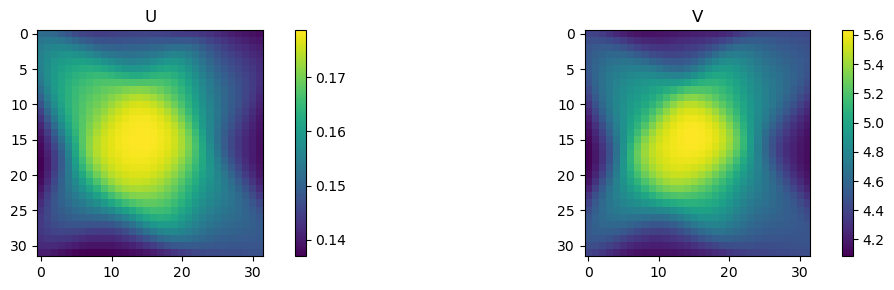

Epoch: 11500
loss boundary: 0.000738, loss physics: 4.995204, loss laplacian: 1.999568,  loss initial condition: 0.001517
Laplacian U: 0.179227, Laplacian V: 0.252510


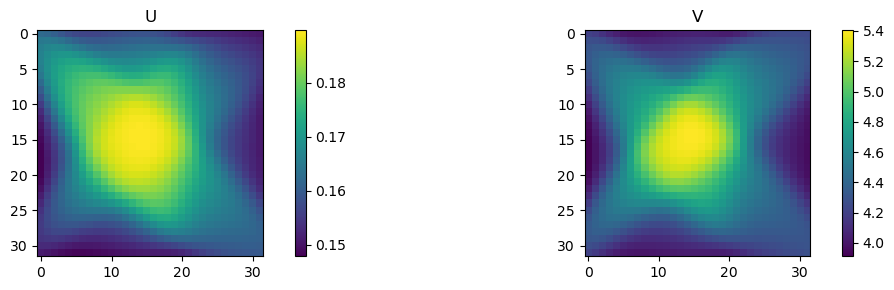

Epoch: 12000
loss boundary: 0.000561, loss physics: 4.920094, loss laplacian: 1.999373,  loss initial condition: 0.000740
Laplacian U: 0.241804, Laplacian V: 0.385504


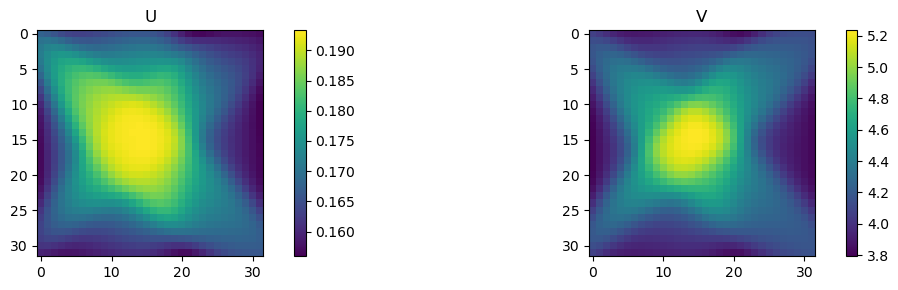

Epoch: 12500
loss boundary: 0.000410, loss physics: 4.836361, loss laplacian: 1.999046,  loss initial condition: 0.000566
Laplacian U: 0.324562, Laplacian V: 0.630137


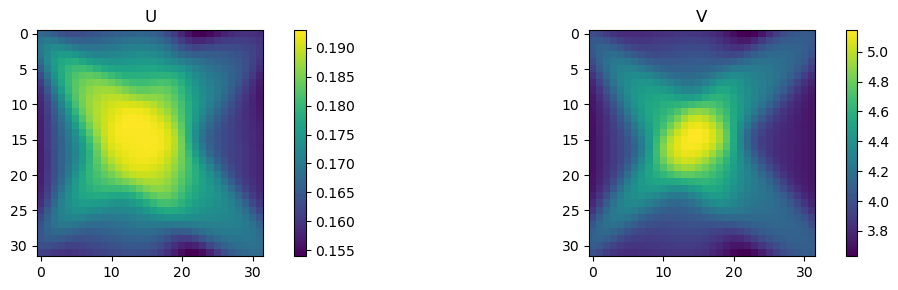

Epoch: 13000
loss boundary: 0.000328, loss physics: 4.911332, loss laplacian: 1.997955,  loss initial condition: 0.000485
Laplacian U: 0.566652, Laplacian V: 1.480081


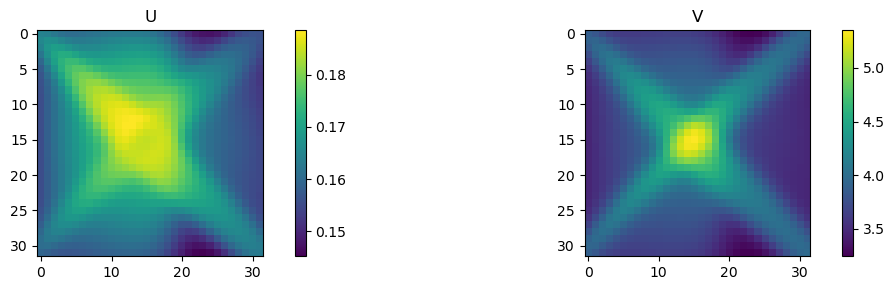

Epoch: 13500
loss boundary: 0.004052, loss physics: 11.876640, loss laplacian: 1.928414,  loss initial condition: 0.003040
Laplacian U: 4.923267, Laplacian V: 69.001137


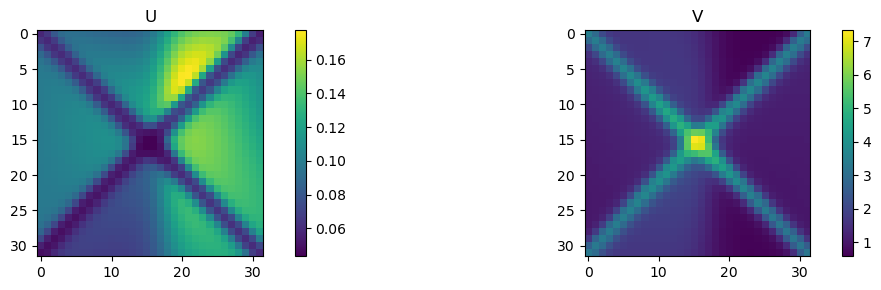

Epoch: 14000
loss boundary: 0.076866, loss physics: 57.205688, loss laplacian: 0.641268,  loss initial condition: 0.029261
Laplacian U: 468.785583, Laplacian V: 4166.542480


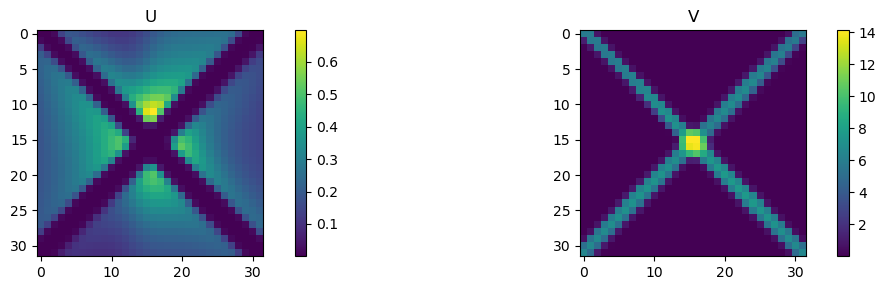

Epoch: 14500
loss boundary: 0.037225, loss physics: 60.893612, loss laplacian: 0.042858,  loss initial condition: 0.022606
Laplacian U: 3274.861572, Laplacian V: 5291.119629


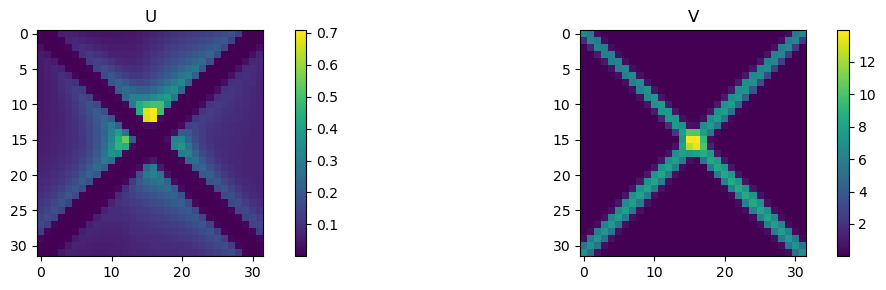

Epoch: 15000
loss boundary: 0.018178, loss physics: 50.593128, loss laplacian: 0.012692,  loss initial condition: 0.010366
Laplacian U: 4625.728027, Laplacian V: 5844.640625


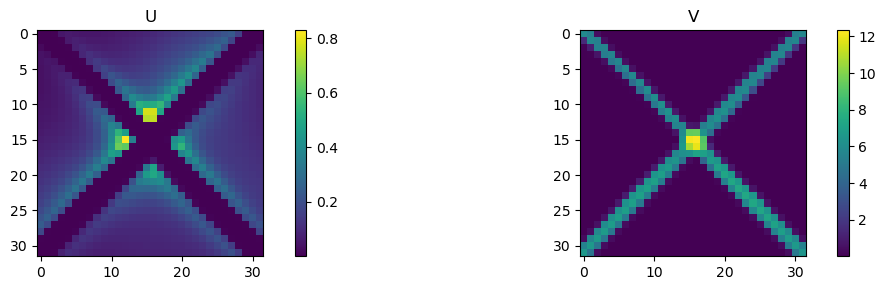

Epoch: 15500
loss boundary: 0.012965, loss physics: 43.580727, loss laplacian: 0.007763,  loss initial condition: 0.005934
Laplacian U: 5236.614746, Laplacian V: 6013.950684


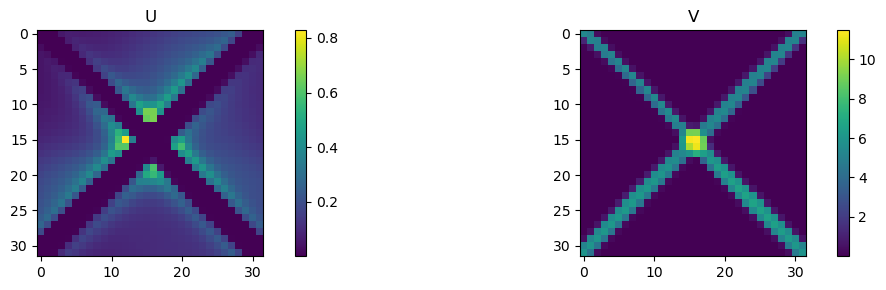

Epoch: 16000
loss boundary: 0.011076, loss physics: 38.247189, loss laplacian: 0.005613,  loss initial condition: 0.003632
Laplacian U: 5663.266602, Laplacian V: 6146.242188


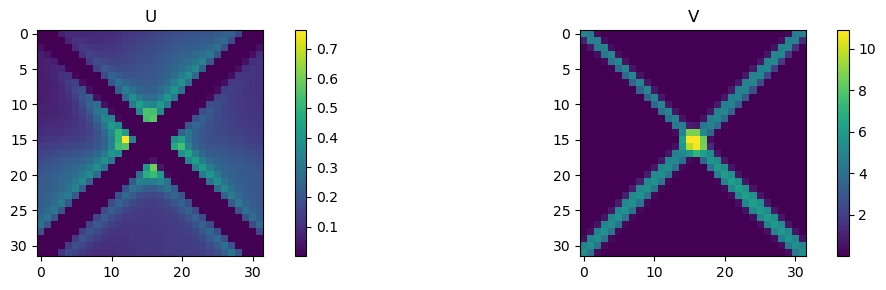

Epoch: 16500
loss boundary: 0.009714, loss physics: 34.055275, loss laplacian: 0.004296,  loss initial condition: 0.002358
Laplacian U: 5992.712402, Laplacian V: 6320.710938


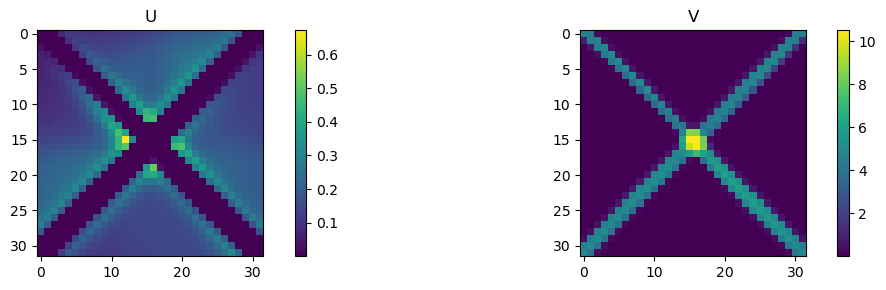

Epoch: 17000
loss boundary: 0.008971, loss physics: 30.487827, loss laplacian: 0.003398,  loss initial condition: 0.001638
Laplacian U: 6246.845215, Laplacian V: 6528.313965


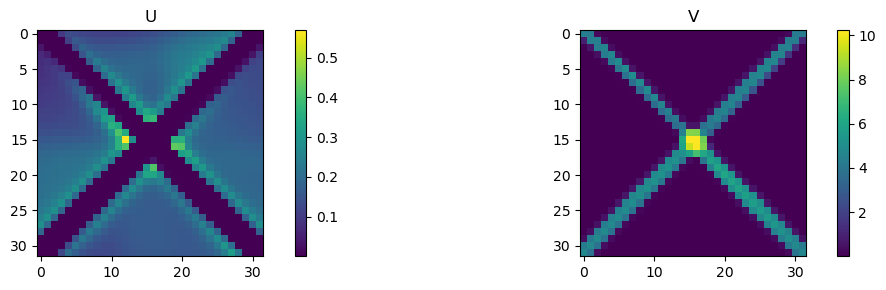

Epoch: 17500
loss boundary: 0.008236, loss physics: 27.345901, loss laplacian: 0.002762,  loss initial condition: 0.001213
Laplacian U: 6445.479004, Laplacian V: 6747.468750


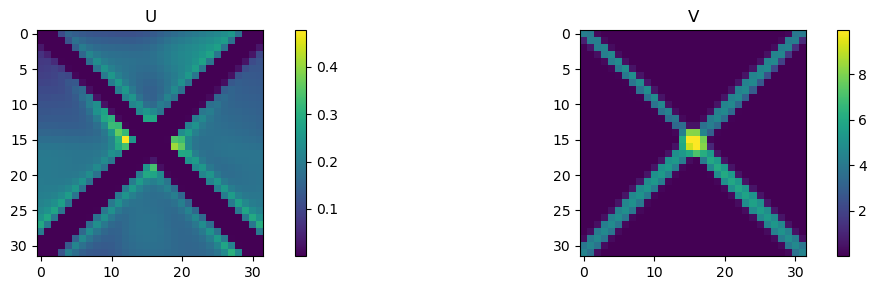

Epoch: 18000
loss boundary: 0.007064, loss physics: 24.419268, loss laplacian: 0.002267,  loss initial condition: 0.000950
Laplacian U: 6614.371094, Laplacian V: 6984.796875


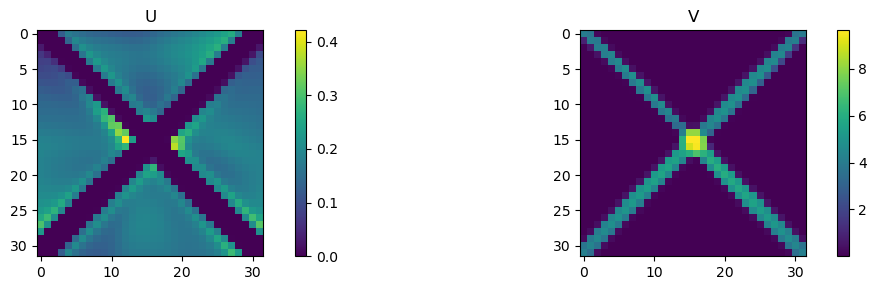

Epoch: 18500
loss boundary: 0.006103, loss physics: 21.850266, loss laplacian: 0.001819,  loss initial condition: 0.000787
Laplacian U: 6773.375000, Laplacian V: 7300.315430


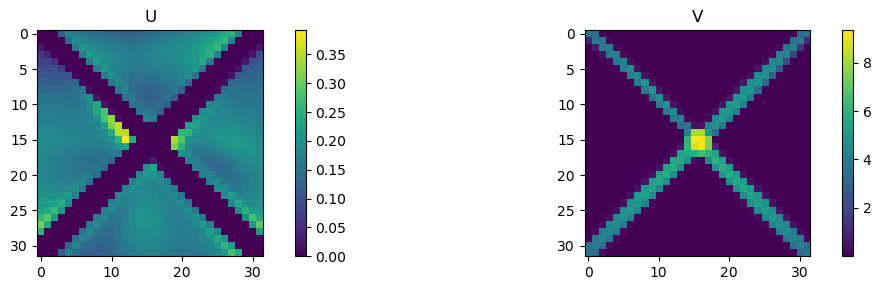

Epoch: 19000
loss boundary: 0.005262, loss physics: 19.607853, loss laplacian: 0.001468,  loss initial condition: 0.000703
Laplacian U: 6920.474121, Laplacian V: 7639.621094


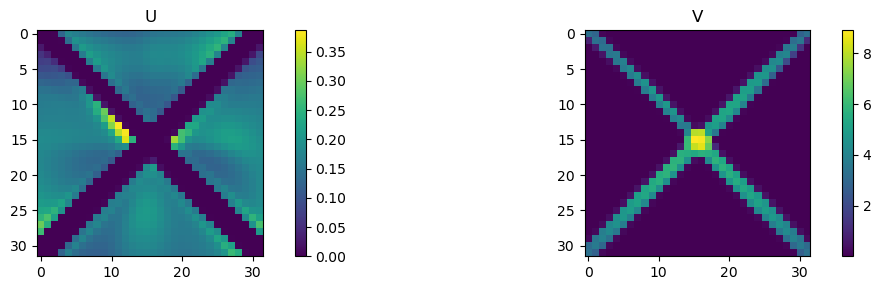

Epoch: 19500
loss boundary: 0.004456, loss physics: 17.623051, loss laplacian: 0.001200,  loss initial condition: 0.000664
Laplacian U: 7050.481934, Laplacian V: 8006.190430


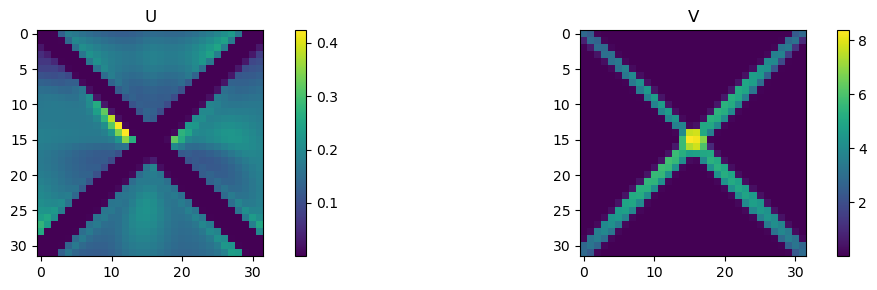

Epoch: 20000
loss boundary: 0.003766, loss physics: 15.831170, loss laplacian: 0.001002,  loss initial condition: 0.000640
Laplacian U: 7164.497559, Laplacian V: 8384.837891


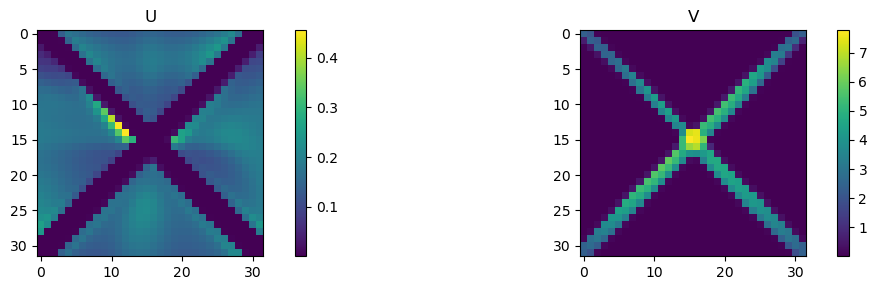

Epoch: 20500
loss boundary: 0.003201, loss physics: 14.225456, loss laplacian: 0.000854,  loss initial condition: 0.000608
Laplacian U: 7270.104492, Laplacian V: 8754.511719


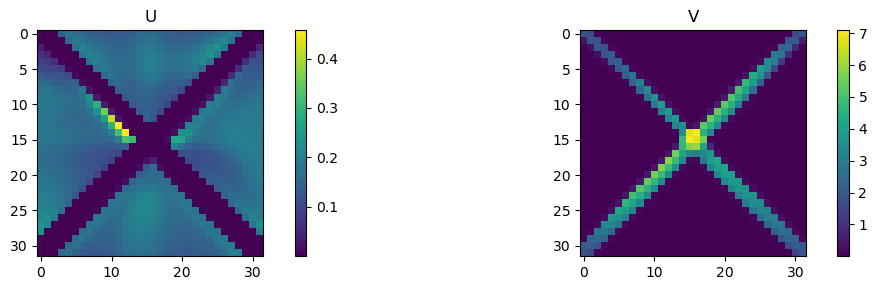

Epoch: 21000
loss boundary: 0.002717, loss physics: 12.904083, loss laplacian: 0.000734,  loss initial condition: 0.000573
Laplacian U: 7383.504395, Laplacian V: 9089.239258


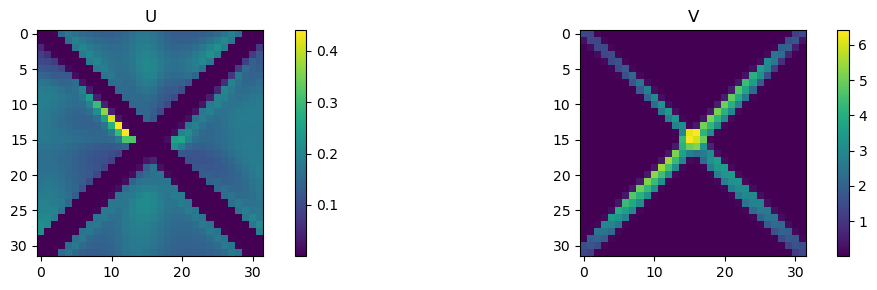

Epoch: 21500
loss boundary: 0.002411, loss physics: 11.789099, loss laplacian: 0.000643,  loss initial condition: 0.000542
Laplacian U: 7487.371582, Laplacian V: 9392.657227


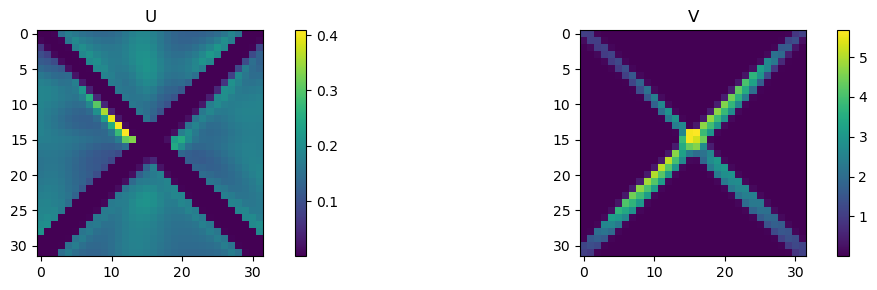

Epoch: 22000
loss boundary: 0.002234, loss physics: 10.773747, loss laplacian: 0.000579,  loss initial condition: 0.000516
Laplacian U: 7566.828125, Laplacian V: 9691.805664


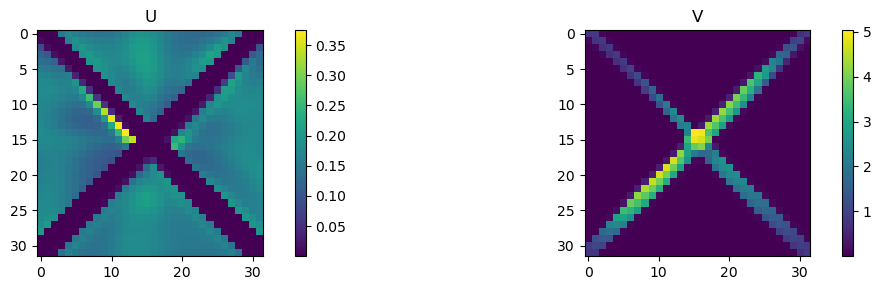

Epoch: 22500
loss boundary: 0.002243, loss physics: 9.687181, loss laplacian: 0.000553,  loss initial condition: 0.000493
Laplacian U: 7588.593750, Laplacian V: 9962.661133


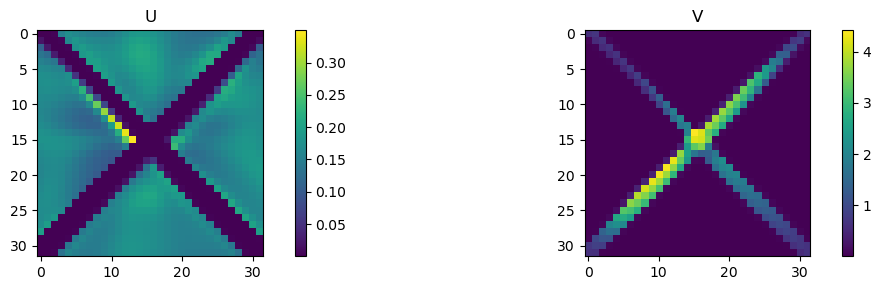

Epoch: 23000
loss boundary: 0.002131, loss physics: 8.164701, loss laplacian: 0.000231,  loss initial condition: 0.000479
Laplacian U: 8518.293945, Laplacian V: 10382.330078


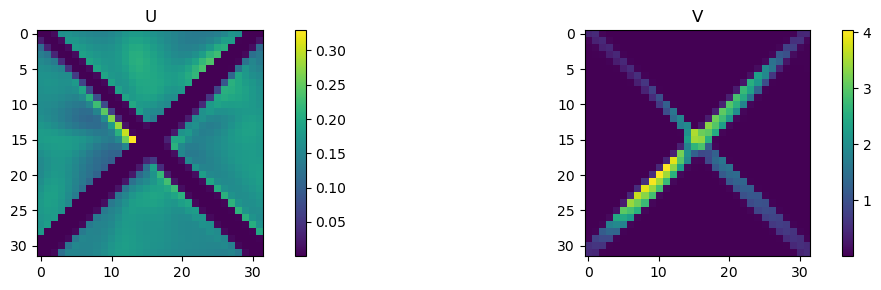

Epoch: 23500
loss boundary: 0.001691, loss physics: 7.476925, loss laplacian: 0.000133,  loss initial condition: 0.000443
Laplacian U: 9131.033203, Laplacian V: 10612.429688


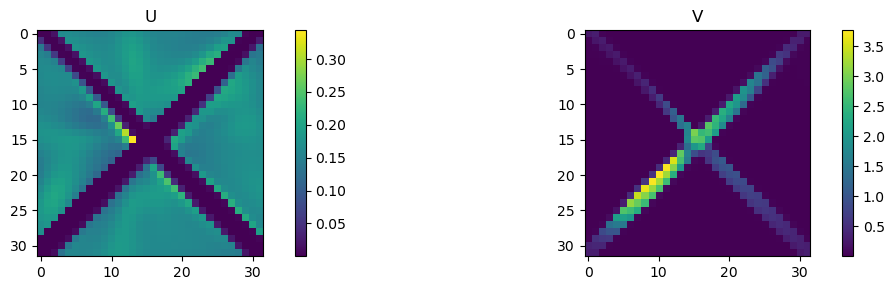

Epoch: 24000
loss boundary: 0.001310, loss physics: 7.042167, loss laplacian: 0.000090,  loss initial condition: 0.000415
Laplacian U: 9561.935547, Laplacian V: 10828.393555


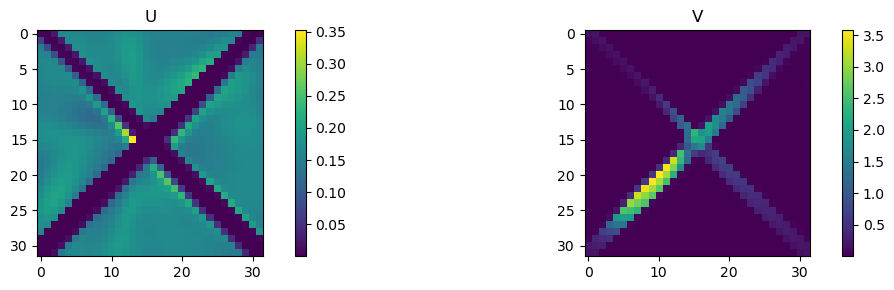

Epoch: 24500
loss boundary: 0.001026, loss physics: 6.736589, loss laplacian: 0.000064,  loss initial condition: 0.000396
Laplacian U: 9934.364258, Laplacian V: 11085.646484


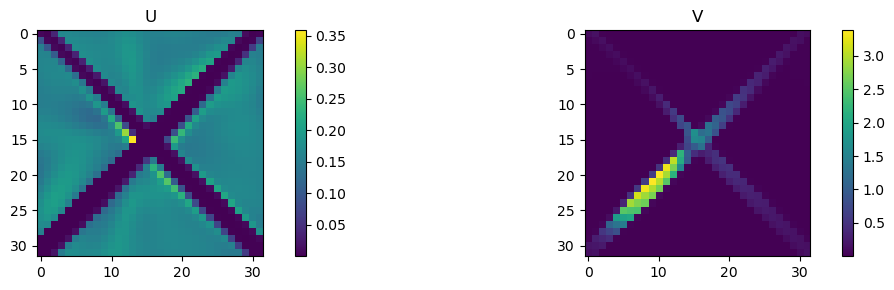

Epoch: 25000
loss boundary: 0.000827, loss physics: 6.513023, loss laplacian: 0.000047,  loss initial condition: 0.000367
Laplacian U: 10273.259766, Laplacian V: 11259.222656


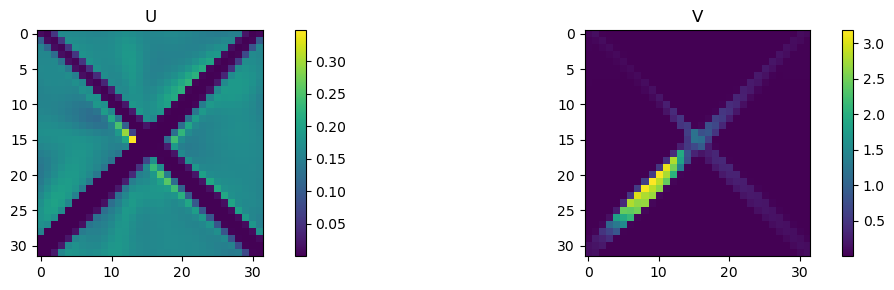

Epoch: 25500
loss boundary: 0.000701, loss physics: 6.325847, loss laplacian: 0.000039,  loss initial condition: 0.000337
Laplacian U: 10560.265625, Laplacian V: 11232.331055


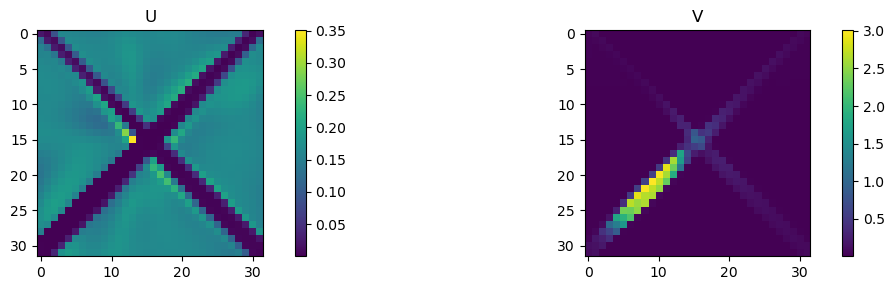

Epoch: 26000
loss boundary: 0.000764, loss physics: 6.003522, loss laplacian: 0.000037,  loss initial condition: 0.000321
Laplacian U: 10819.227539, Laplacian V: 10966.668945


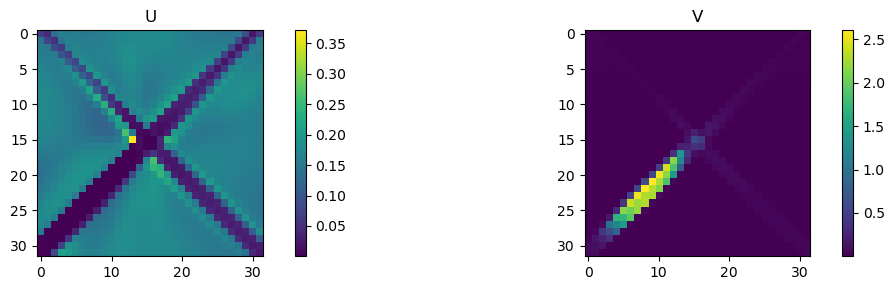

Epoch: 26500
loss boundary: 0.000836, loss physics: 5.664543, loss laplacian: 0.000030,  loss initial condition: 0.000306
Laplacian U: 11119.653320, Laplacian V: 11066.540039


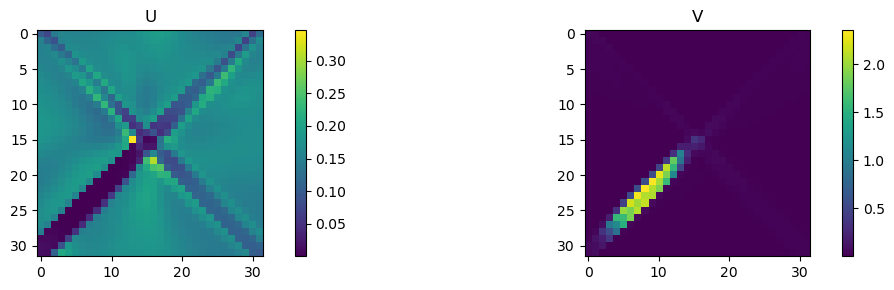

Epoch: 27000
loss boundary: 0.000690, loss physics: 5.479300, loss laplacian: 0.000024,  loss initial condition: 0.000290
Laplacian U: 11384.549805, Laplacian V: 11254.565430


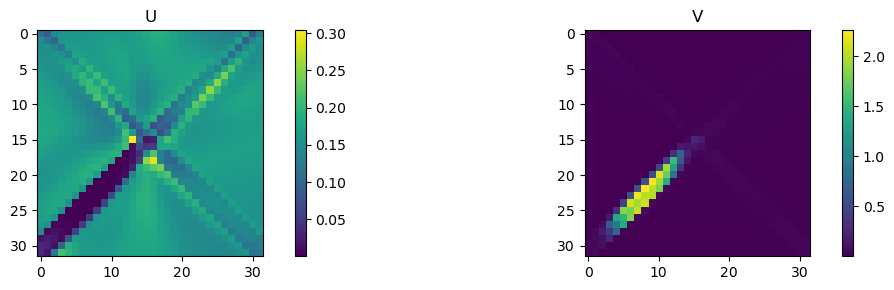

Epoch: 27500
loss boundary: 0.000526, loss physics: 5.343524, loss laplacian: 0.000020,  loss initial condition: 0.000275
Laplacian U: 11685.708008, Laplacian V: 11349.575195


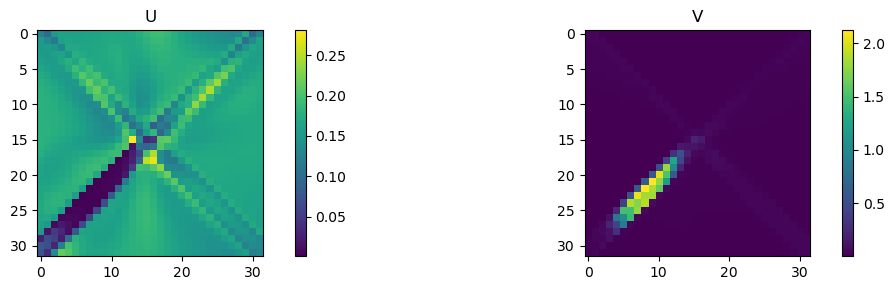

Epoch: 28000
loss boundary: 0.000429, loss physics: 5.234638, loss laplacian: 0.000017,  loss initial condition: 0.000260
Laplacian U: 11934.477539, Laplacian V: 11467.484375


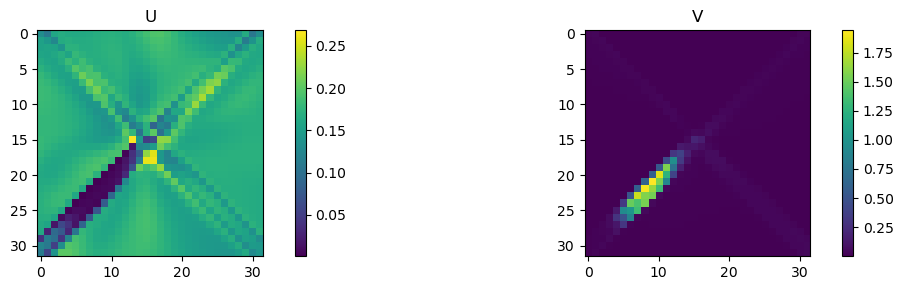

Epoch: 28500
loss boundary: 0.000378, loss physics: 5.145151, loss laplacian: 0.000015,  loss initial condition: 0.000243
Laplacian U: 12151.817383, Laplacian V: 11527.291992


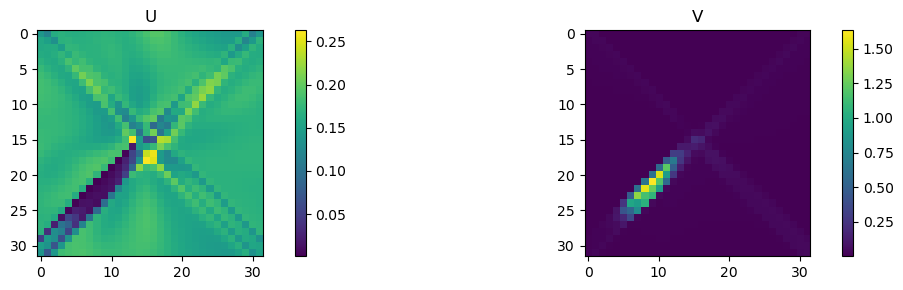

Epoch: 29000
loss boundary: 0.000343, loss physics: 5.068008, loss laplacian: 0.000013,  loss initial condition: 0.000224
Laplacian U: 12333.051758, Laplacian V: 11650.690430


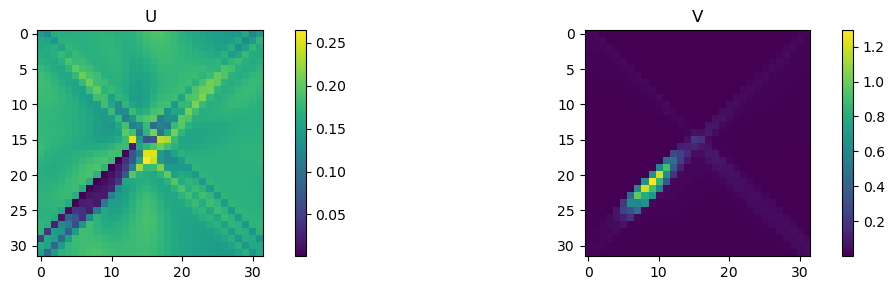

Epoch: 29500
loss boundary: 0.000309, loss physics: 5.000498, loss laplacian: 0.000011,  loss initial condition: 0.000196
Laplacian U: 12497.989258, Laplacian V: 11774.776367


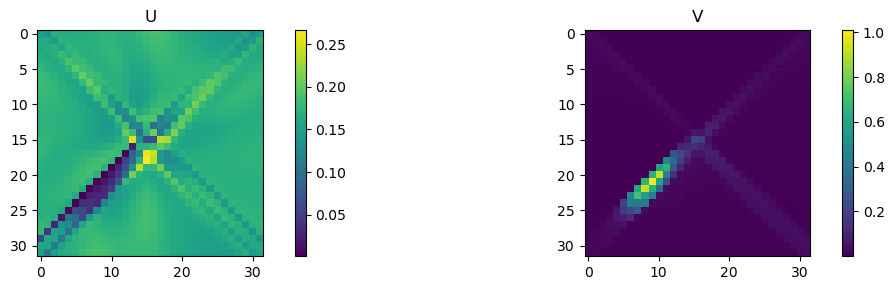

Epoch: 30000
loss boundary: 0.000288, loss physics: 4.947613, loss laplacian: 0.000010,  loss initial condition: 0.000157
Laplacian U: 12699.048828, Laplacian V: 11908.440430


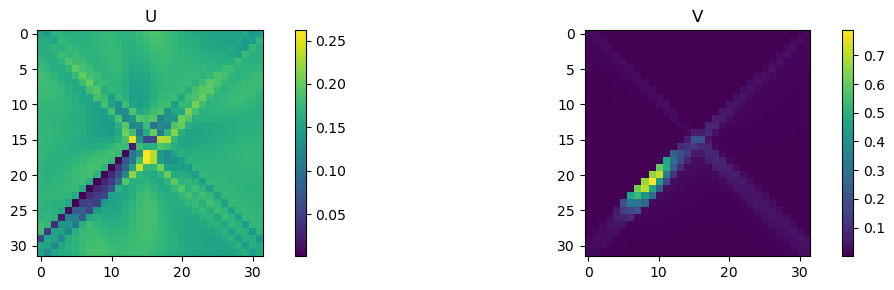

Epoch: 30500
loss boundary: 0.000280, loss physics: 4.907992, loss laplacian: 0.000008,  loss initial condition: 0.000132
Laplacian U: 12847.034180, Laplacian V: 12134.375000


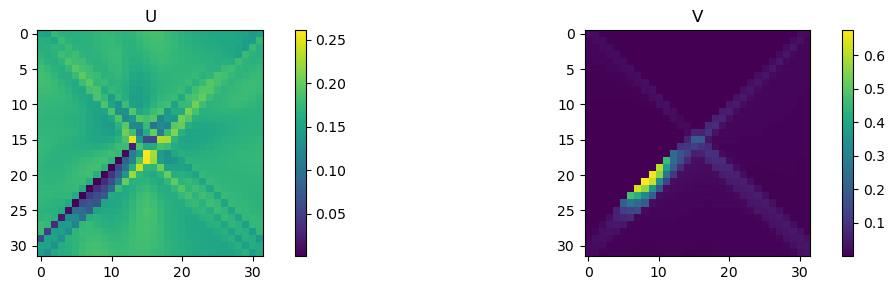

Epoch: 31000
loss boundary: 0.000268, loss physics: 4.869561, loss laplacian: 0.000007,  loss initial condition: 0.000112
Laplacian U: 13029.165039, Laplacian V: 12201.710938


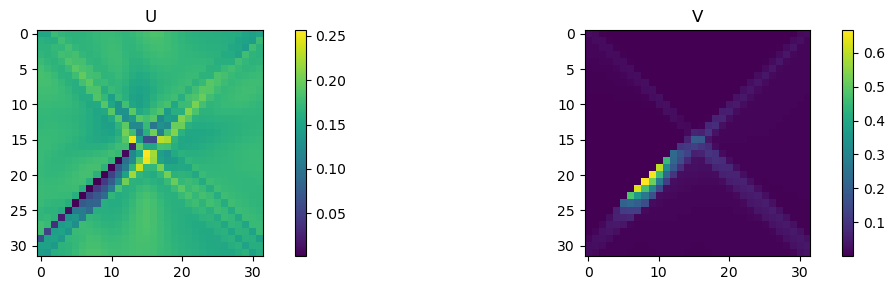

Epoch: 31500
loss boundary: 0.000260, loss physics: 4.838695, loss laplacian: 0.000006,  loss initial condition: 0.000098
Laplacian U: 13172.040039, Laplacian V: 12322.777344


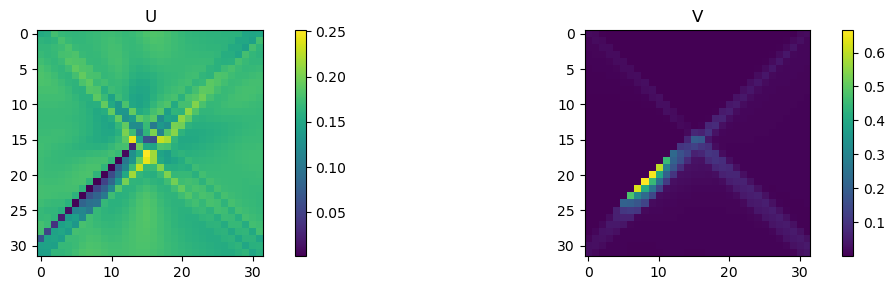

Epoch: 32000
loss boundary: 0.000251, loss physics: 4.810617, loss laplacian: 0.000006,  loss initial condition: 0.000085
Laplacian U: 13304.392578, Laplacian V: 12450.571289


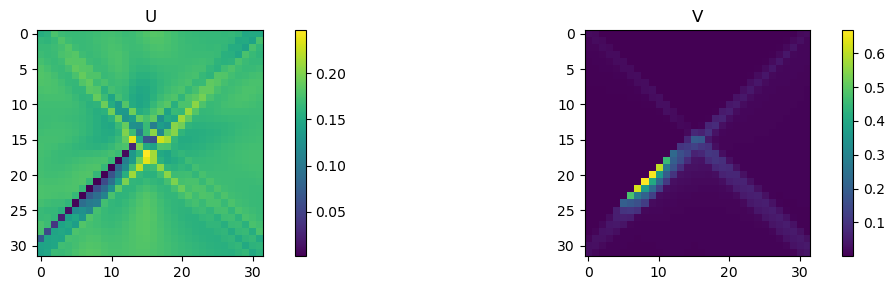

Epoch: 32500
loss boundary: 0.000239, loss physics: 4.784852, loss laplacian: 0.000005,  loss initial condition: 0.000074
Laplacian U: 13443.208984, Laplacian V: 12535.752930


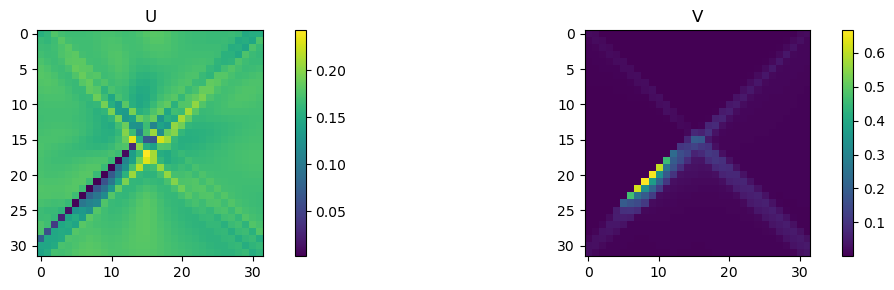

Epoch: 33000
loss boundary: 0.000228, loss physics: 4.760619, loss laplacian: 0.000004,  loss initial condition: 0.000066
Laplacian U: 13580.176758, Laplacian V: 12644.724609


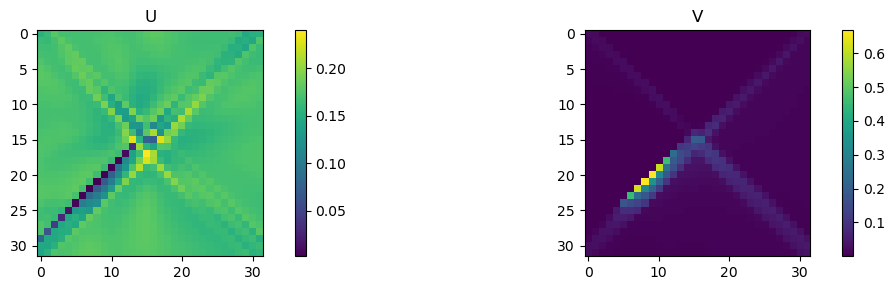

Epoch: 33500
loss boundary: 0.000218, loss physics: 4.738106, loss laplacian: 0.000004,  loss initial condition: 0.000059
Laplacian U: 13729.352539, Laplacian V: 12727.943359


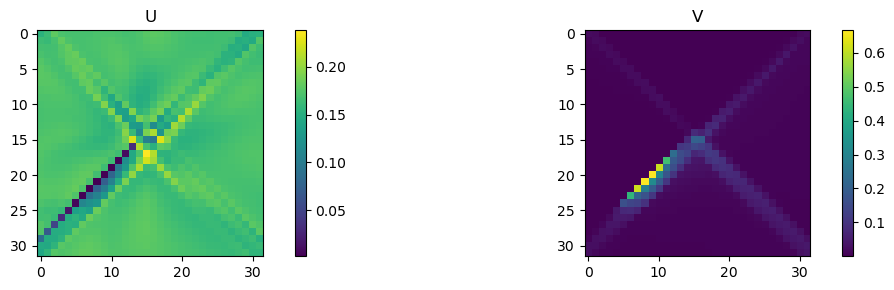

Epoch: 34000
loss boundary: 0.000209, loss physics: 4.717402, loss laplacian: 0.000004,  loss initial condition: 0.000054
Laplacian U: 13885.458008, Laplacian V: 12823.229492


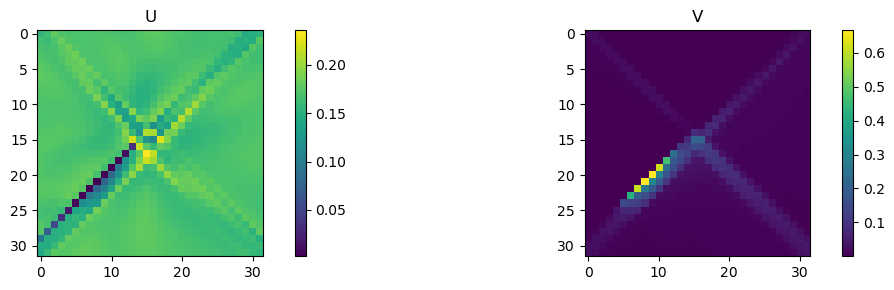

Epoch: 34500
loss boundary: 0.000201, loss physics: 4.697907, loss laplacian: 0.000003,  loss initial condition: 0.000050
Laplacian U: 14050.524414, Laplacian V: 12879.505859


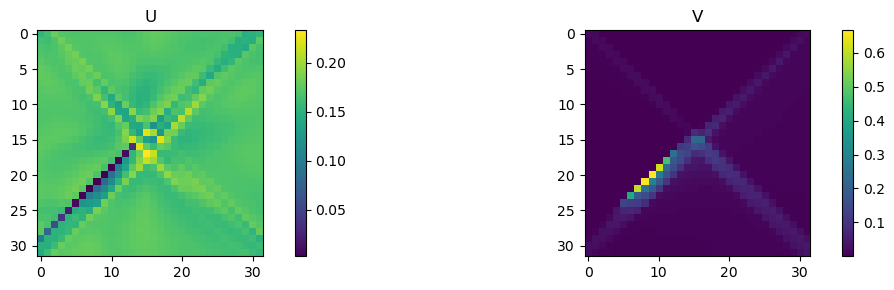

Epoch: 35000
loss boundary: 0.000194, loss physics: 4.679699, loss laplacian: 0.000003,  loss initial condition: 0.000046
Laplacian U: 14220.976562, Laplacian V: 12949.699219


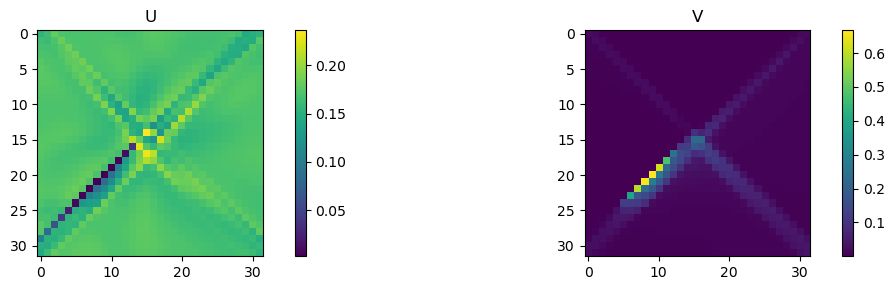

Epoch: 35500
loss boundary: 0.000189, loss physics: 4.662561, loss laplacian: 0.000003,  loss initial condition: 0.000043
Laplacian U: 14403.761719, Laplacian V: 12985.817383


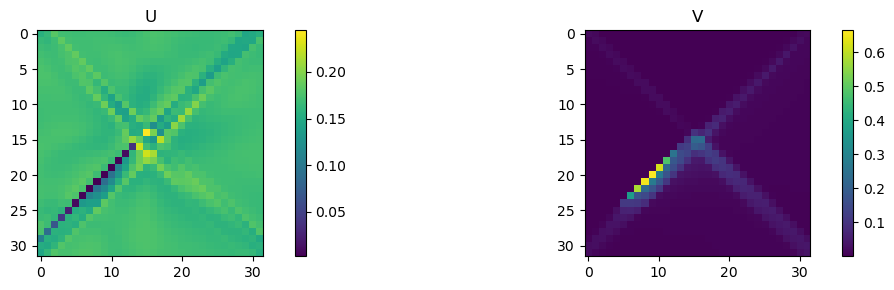

Epoch: 36000
loss boundary: 0.000184, loss physics: 4.646481, loss laplacian: 0.000003,  loss initial condition: 0.000041
Laplacian U: 14586.093750, Laplacian V: 13033.791992


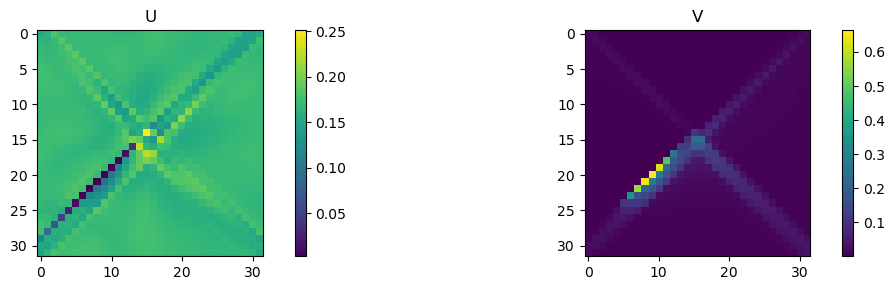

Epoch: 36500
loss boundary: 0.000179, loss physics: 4.631123, loss laplacian: 0.000002,  loss initial condition: 0.000039
Laplacian U: 14769.335938, Laplacian V: 13073.452148


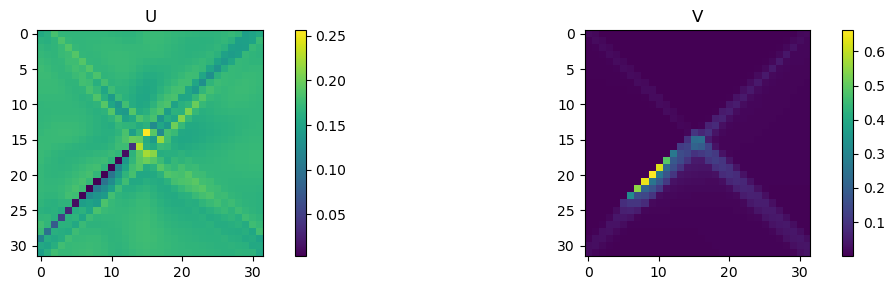

Epoch: 37000
loss boundary: 0.000175, loss physics: 4.616178, loss laplacian: 0.000002,  loss initial condition: 0.000037
Laplacian U: 14950.818359, Laplacian V: 13114.774414


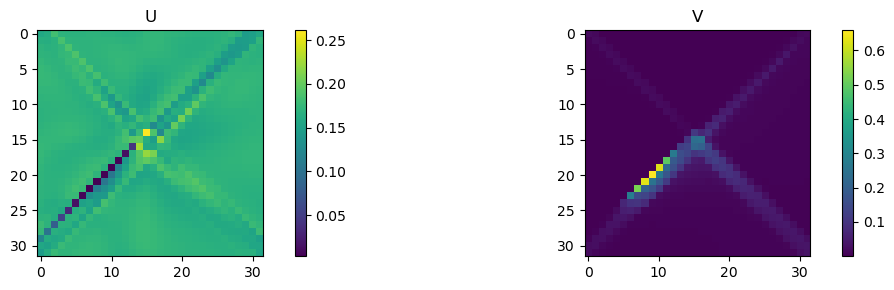

Epoch: 37500
loss boundary: 0.000172, loss physics: 4.601475, loss laplacian: 0.000002,  loss initial condition: 0.000035
Laplacian U: 15139.179688, Laplacian V: 13125.315430


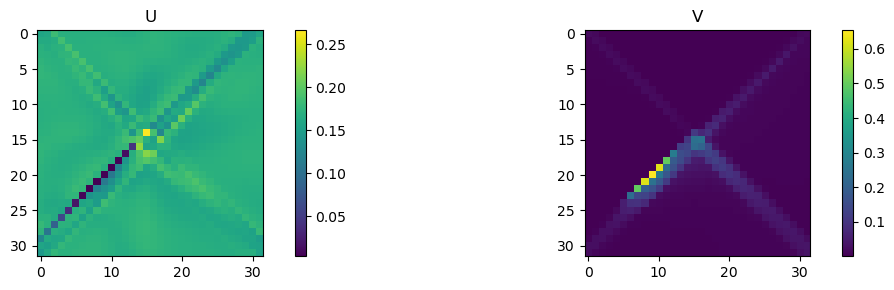

Epoch: 38000
loss boundary: 0.000170, loss physics: 4.587377, loss laplacian: 0.000002,  loss initial condition: 0.000034
Laplacian U: 15322.623047, Laplacian V: 13159.960938


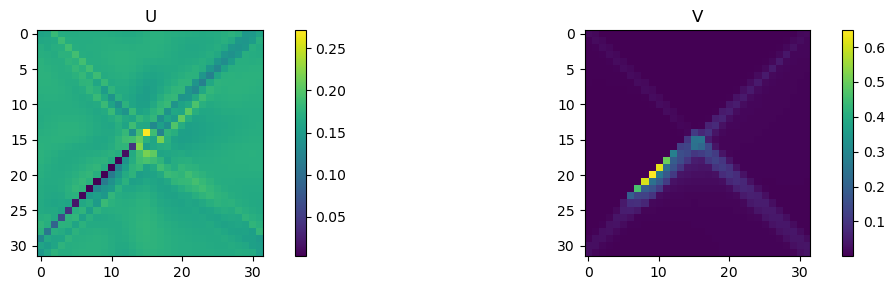

Epoch: 38500
loss boundary: 0.000168, loss physics: 4.573837, loss laplacian: 0.000002,  loss initial condition: 0.000033
Laplacian U: 15511.187500, Laplacian V: 13151.596680


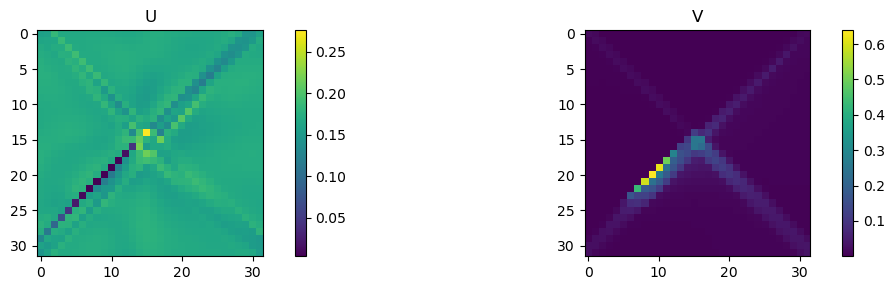

Epoch: 39000
loss boundary: 0.000168, loss physics: 4.560258, loss laplacian: 0.000002,  loss initial condition: 0.000032
Laplacian U: 15693.992188, Laplacian V: 13219.713867


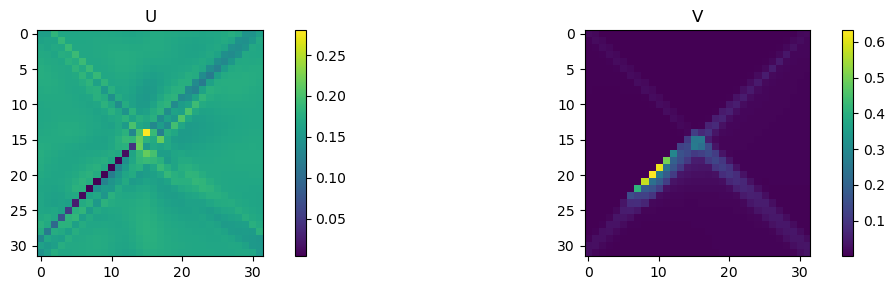

Epoch: 39500
loss boundary: 0.000164, loss physics: 4.547101, loss laplacian: 0.000002,  loss initial condition: 0.000031
Laplacian U: 15909.213867, Laplacian V: 13232.830078


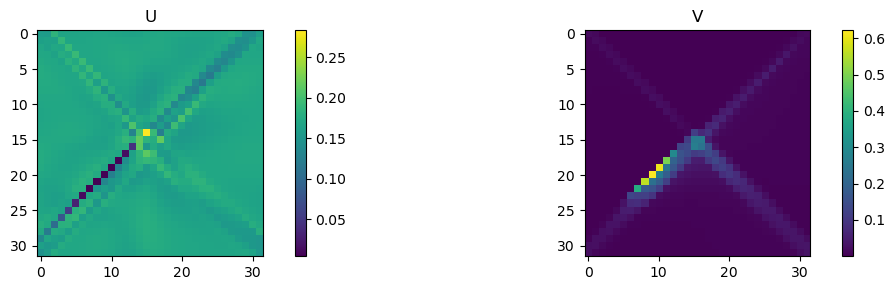

Epoch: 40000
loss boundary: 0.000165, loss physics: 4.534791, loss laplacian: 0.000002,  loss initial condition: 0.000031
Laplacian U: 16098.804688, Laplacian V: 13329.120117


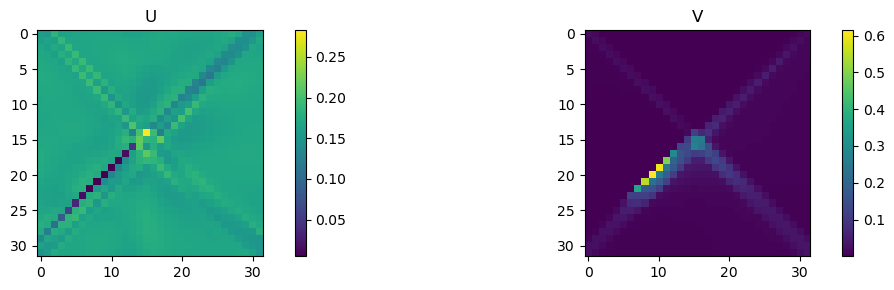

Epoch: 40500
loss boundary: 0.000167, loss physics: 4.519509, loss laplacian: 0.000002,  loss initial condition: 0.000030
Laplacian U: 16372.392578, Laplacian V: 13298.291992


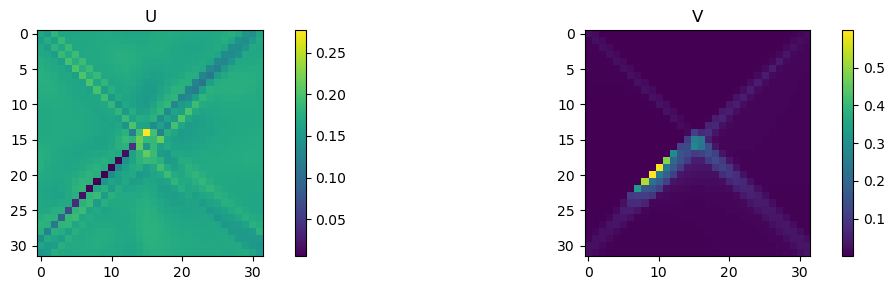

Epoch: 41000
loss boundary: 0.000167, loss physics: 4.502423, loss laplacian: 0.000002,  loss initial condition: 0.000029
Laplacian U: 16706.500000, Laplacian V: 13218.710938


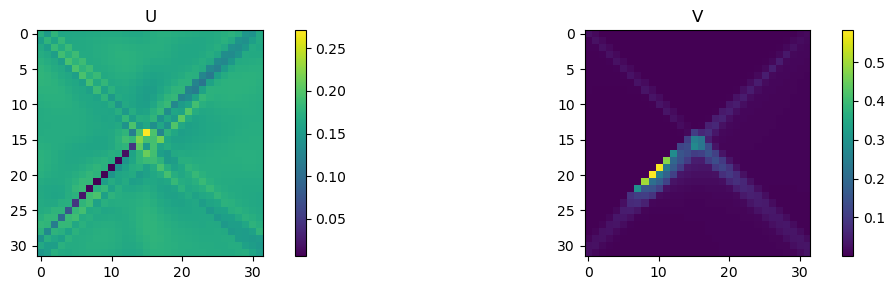

Epoch: 41500
loss boundary: 0.000164, loss physics: 4.486391, loss laplacian: 0.000002,  loss initial condition: 0.000029
Laplacian U: 17001.683594, Laplacian V: 13223.159180


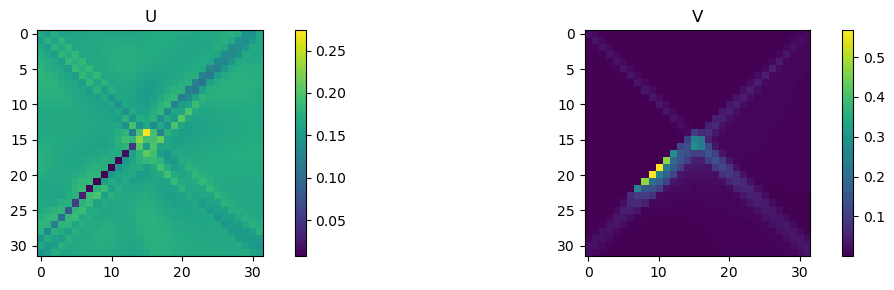

Epoch: 42000
loss boundary: 0.000162, loss physics: 4.472989, loss laplacian: 0.000002,  loss initial condition: 0.000028
Laplacian U: 17398.628906, Laplacian V: 13115.637695


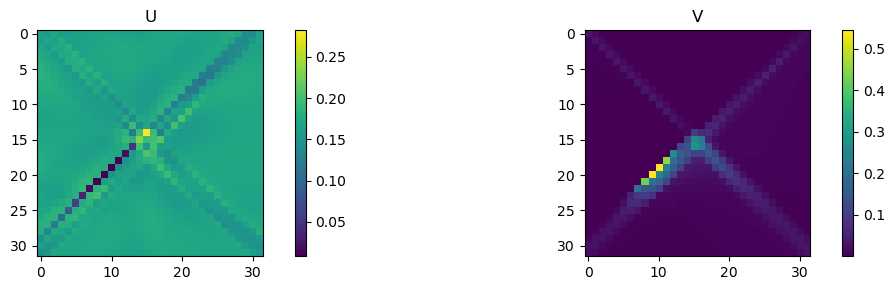

Epoch: 42500
loss boundary: 0.000160, loss physics: 4.456595, loss laplacian: 0.000002,  loss initial condition: 0.000028
Laplacian U: 17728.113281, Laplacian V: 13140.620117


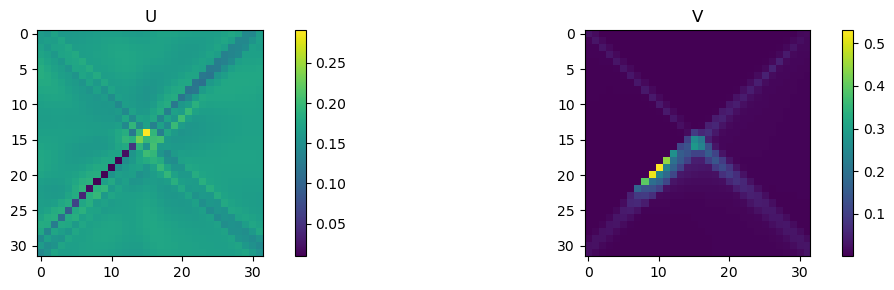

Epoch: 43000
loss boundary: 0.000158, loss physics: 4.442164, loss laplacian: 0.000002,  loss initial condition: 0.000027
Laplacian U: 18139.484375, Laplacian V: 13104.120117


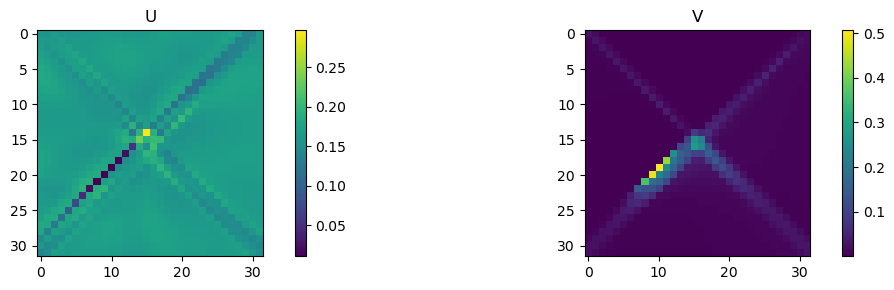

Epoch: 43500
loss boundary: 0.000158, loss physics: 4.427728, loss laplacian: 0.000002,  loss initial condition: 0.000027
Laplacian U: 18646.640625, Laplacian V: 13039.149414


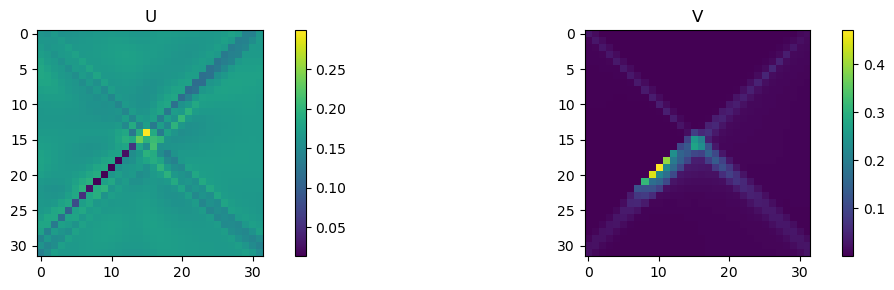

Epoch: 44000
loss boundary: 0.000164, loss physics: 4.413194, loss laplacian: 0.000002,  loss initial condition: 0.000026
Laplacian U: 19312.019531, Laplacian V: 12970.846680


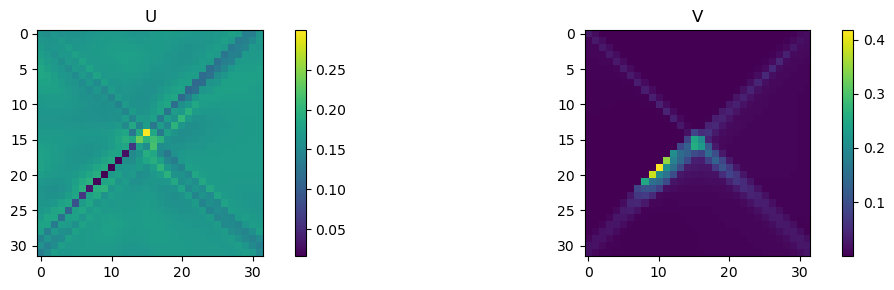

Epoch: 44500
loss boundary: 0.000157, loss physics: 4.397923, loss laplacian: 0.000002,  loss initial condition: 0.000026
Laplacian U: 20114.337891, Laplacian V: 12906.842773


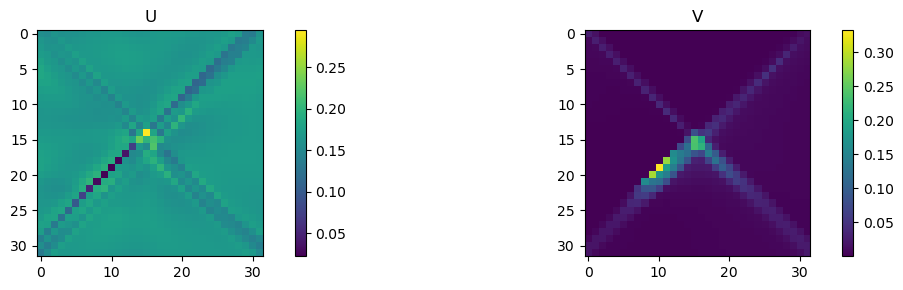

Epoch: 45000
loss boundary: 0.000155, loss physics: 4.379144, loss laplacian: 0.000002,  loss initial condition: 0.000026
Laplacian U: 20911.580078, Laplacian V: 12938.158203


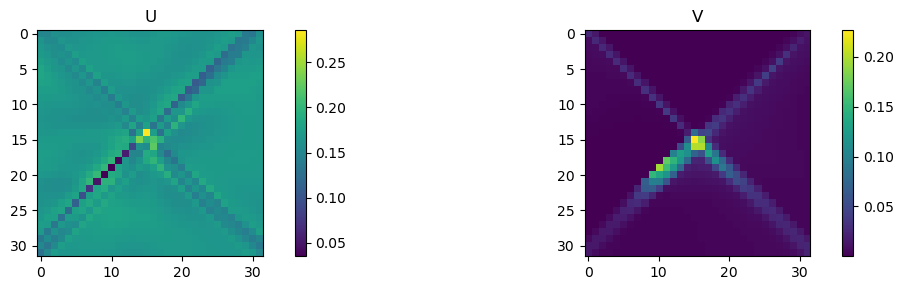

Epoch: 45500
loss boundary: 0.000155, loss physics: 4.361654, loss laplacian: 0.000002,  loss initial condition: 0.000025
Laplacian U: 21218.761719, Laplacian V: 13168.367188


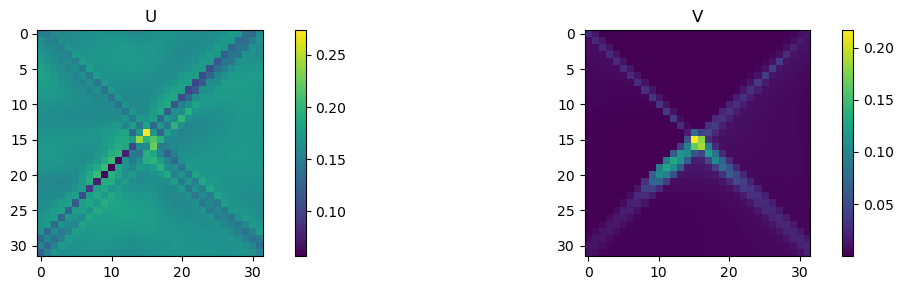

Epoch: 46000
loss boundary: 0.000154, loss physics: 4.346400, loss laplacian: 0.000002,  loss initial condition: 0.000025
Laplacian U: 21238.402344, Laplacian V: 13388.671875


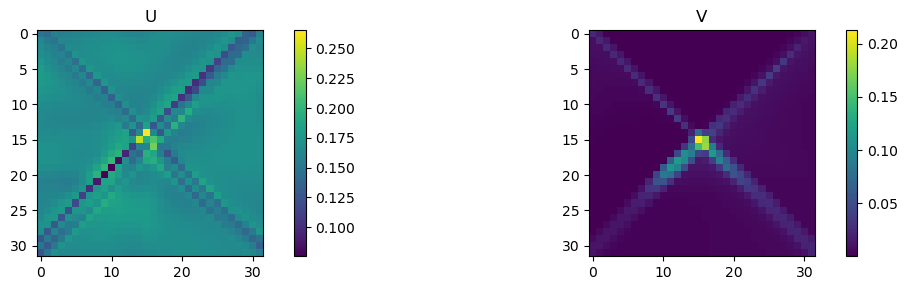

Epoch: 46500
loss boundary: 0.000155, loss physics: 4.332324, loss laplacian: 0.000001,  loss initial condition: 0.000025
Laplacian U: 21297.855469, Laplacian V: 13574.091797


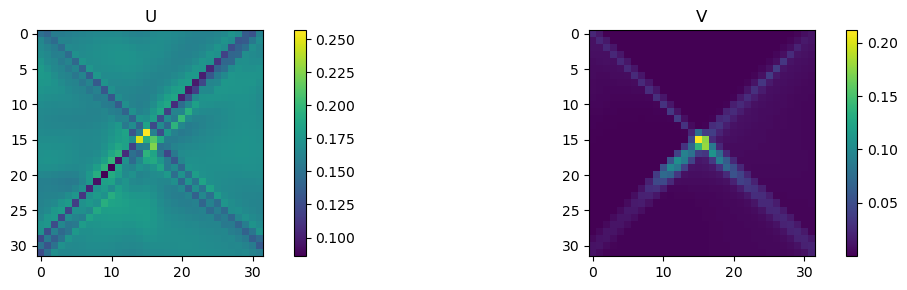

Epoch: 47000
loss boundary: 0.000152, loss physics: 4.320110, loss laplacian: 0.000001,  loss initial condition: 0.000025
Laplacian U: 21315.072266, Laplacian V: 13683.166992


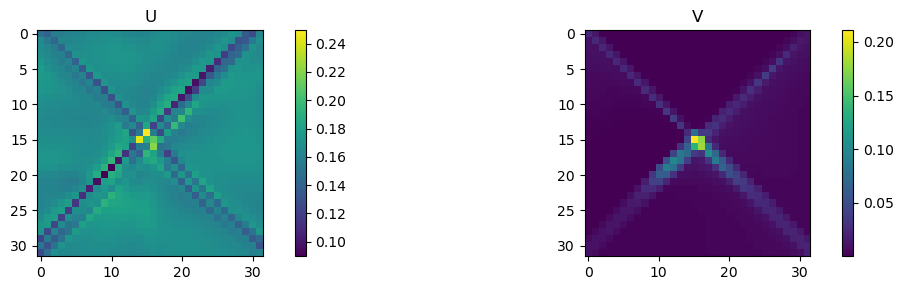

Epoch: 47500
loss boundary: 0.000151, loss physics: 4.307761, loss laplacian: 0.000001,  loss initial condition: 0.000024
Laplacian U: 21459.205078, Laplacian V: 13825.542969


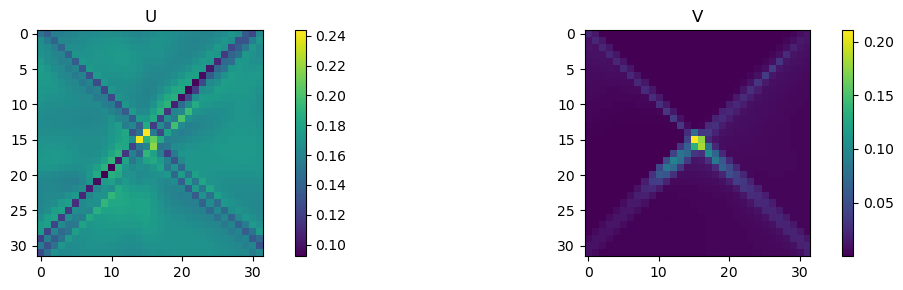

Epoch: 48000
loss boundary: 0.000150, loss physics: 4.296186, loss laplacian: 0.000001,  loss initial condition: 0.000024
Laplacian U: 21554.853516, Laplacian V: 13922.721680


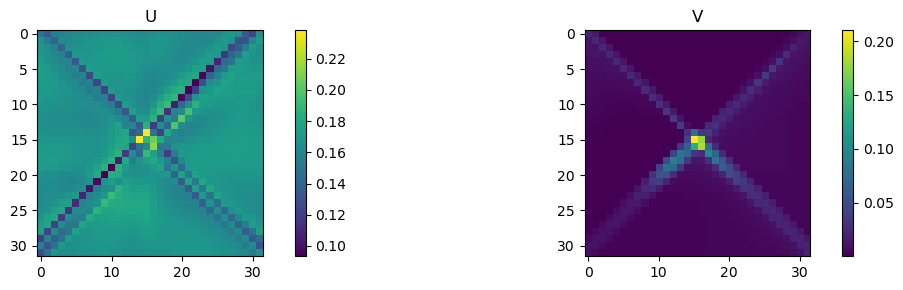

Epoch: 48500
loss boundary: 0.000149, loss physics: 4.285079, loss laplacian: 0.000001,  loss initial condition: 0.000024
Laplacian U: 21636.734375, Laplacian V: 13994.065430


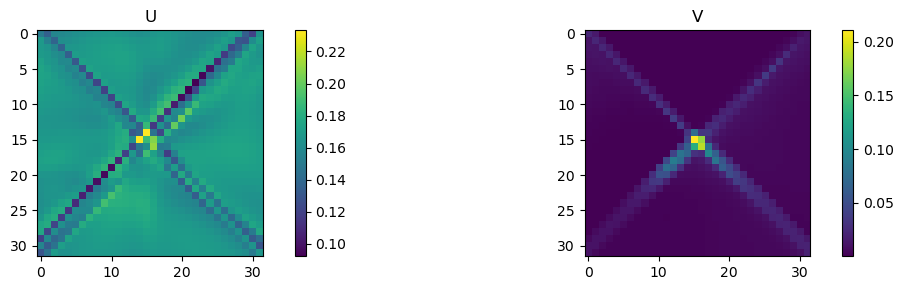

Epoch: 49000
loss boundary: 0.000149, loss physics: 4.274307, loss laplacian: 0.000001,  loss initial condition: 0.000024
Laplacian U: 21740.478516, Laplacian V: 14067.560547


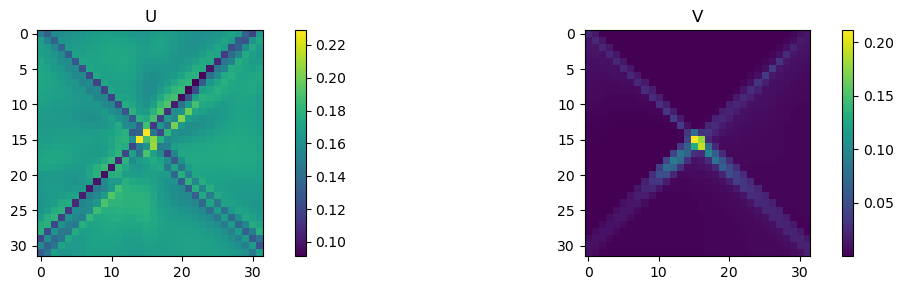

Epoch: 49500
loss boundary: 0.000149, loss physics: 4.263936, loss laplacian: 0.000001,  loss initial condition: 0.000023
Laplacian U: 21850.171875, Laplacian V: 14129.453125


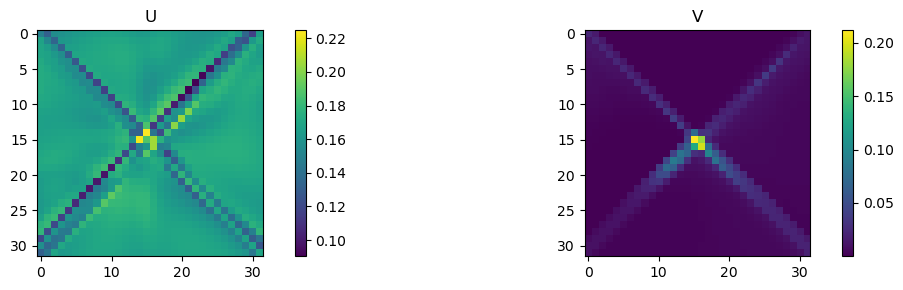

Epoch: 50000
loss boundary: 0.000149, loss physics: 4.253970, loss laplacian: 0.000001,  loss initial condition: 0.000023
Laplacian U: 21962.669922, Laplacian V: 14187.501953


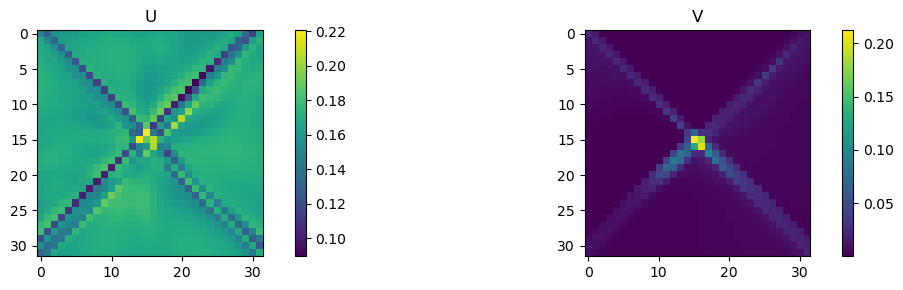

In [148]:
torch.manual_seed(42)
np.random.seed(42)

D_U = 0.0016
D_V = 0.0135

A, B = 4.5, 13.29
Lx, Ly, T_max = 10, 10, 10
Ix, Iy = 32,32
N = Ix*Iy
domain_bounds = torch.tensor([Lx, Ly, T_max]).to(device)

###############################################
# 
x = torch.linspace(0, Lx, Ix).to(device)
y = torch.linspace(0, Ly, Iy).to(device)
t = torch.linspace(0, T_max, T_max+1).to(device)
X,Y = torch.meshgrid(x, y, indexing='ij')
physics_X = torch.vstack([X.flatten(), Y.flatten()]).T
physics_X = torch.hstack([physics_X.repeat(T_max+1, 1), 
                          t.view(-1,1).repeat(1,physics_X.shape[0]).view(-1, 1) ])
# To turn the tensor to a leaf node, we detach and clone it here
physics_X = physics_X.detach().clone()
physics_X.requires_grad = True
##############################################
#
boundary_X_x1 = torch.hstack([x, 
                              torch.ones_like(y)*x[0].item()])
boundary_X_y1 = torch.hstack([torch.ones_like(x)*y[0].item(), 
                              y])
boundary_X_x2 = torch.hstack([x, 
                              torch.ones_like(y)*x[-1].item()])
boundary_X_y2 = torch.hstack([torch.ones_like(x)*y[-1].item(), 
                              y])
boundary_X1 = torch.vstack([boundary_X_x1, boundary_X_y1]).T
boundary_X1 = torch.hstack([boundary_X1.repeat(T_max+1, 1), 
                           t.view(-1,1).repeat(1,boundary_X_x1.shape[0]).view(-1, 1).to(device) ])
boundary_X1.requires_grad_(True)

boundary_X2 = torch.vstack([boundary_X_x2, boundary_X_y2]).T
boundary_X2 = torch.hstack([boundary_X2.repeat(T_max+1, 1), 
                           t.view(-1,1).repeat(1,boundary_X_x2.shape[0]).view(-1, 1).to(device) ])
boundary_X2.requires_grad_(True)
########################################
pi = np.pi
rotation_60 = torch.tensor([[np.cos(pi/3), -np.sin(pi/3), 0], 
                            [np.sin(pi/3), np.cos(pi/3) , 0],
                            [0           ,0             , 1]], dtype=torch.float).to(device)
############################################
# Initial condition
X,Y = torch.meshgrid(x, y, indexing='ij')
Initial_X = torch.vstack([X.flatten(), Y.flatten()]).T
Initial_U = A*torch.ones(Initial_X.shape[0]).to(device)
Initial_V = (B/A)*torch.ones(Initial_X.shape[0]).to(device)
#Initial_U += torch.randn_like(Initial_U) * .1
X_centered = X.flatten() - Lx/2
Y_centered = Y.flatten() - Ly/2

Initial_U -= 1.0 * torch.exp(-1.0*(X_centered**2 + Y_centered**2)).to(device)
#Initial_V += torch.randn_like(Initial_V) * 0.1
Initial_V += 1.0 * torch.exp(-1.0*(X_centered**2 + Y_centered**2)**2).to(device)


Initial_X = torch.hstack([Initial_X, torch.zeros(1).repeat(Initial_X.shape[0]).view(1, -1).T.to(device)])

lb = torch.tensor([0., 0., 0.]).to(device)
ub = torch.tensor([Lx, Ly, T_max+1]).to(device)
model = Net_dense_normalised([3, 64, 64, 64, 2], lb, ub).to(device)

optimizer = torch.optim.Adam([
                {'params': model.parameters()},
            ], lr=1e-4, weight_decay=0.0000)
epochs = 50000
loss_boundary = 0.0
lambda_boundary = 10#torch.nn.Parameter(torch.ones(1, device=f"{device.type}:{device.index}"))*0.5#1.0
loss_physics = 0.0
lambda_physics = 1e-1#torch.nn.Parameter(torch.ones(1, device=f"{device.type}:{device.index}"))*0.5#5e-3
lambda_initial = 100
loss_laplacian = 0.0
lambda_laplacian = 100
loss_symmetry = 0.0
lambda_symmetry = 10

losses = np.zeros((4, epochs))
laplacian_values = np.zeros((2, epochs))

def XYZ_gradient(outputs, xyz_inputs):
    dxyz  = torch.autograd.grad(outputs, xyz_inputs, torch.ones_like(outputs), create_graph=True)[0]# computes dy/dx    
    dx, dy, dz = dxyz[:,0], dxyz[:,1], dxyz[:,2]
    return dx, dy, dx

def LaplacianT(outputs, xyt_inputs):
    dx, dy, dt = XYZ_gradient(outputs, xyt_inputs)
    dx2, _, _ =  XYZ_gradient(dx, xyt_inputs)
    _, dy2, _ =  XYZ_gradient(dy, xyt_inputs)
    return dx2 + dy2, dt

for i in range(epochs):
    optimizer.zero_grad()

    #################################
    # boundary loss    
    boundary_f_hat1 = model(boundary_X1).squeeze()
    U1 = boundary_f_hat1[:,0]
    V1 = boundary_f_hat1[:,1]
    boundary_f_hat2 = model(boundary_X2).squeeze()
    U2 = boundary_f_hat2[:,0]
    V2 = boundary_f_hat2[:,1]

    loss_boundary = torch.mean((U1-U2)**2 + (V1-V2)**2) 

    #################################
    # physics derivatives
    physics_f_hat = model(physics_X).squeeze()
    U = physics_f_hat[:,0]
    V = physics_f_hat[:,1]
    
    laplacianU, dUdt = LaplacianT(U, physics_X)
    laplacianV, dVdt = LaplacianT(V, physics_X)
        
    FU = A - (B + 1) * U + U*U*V - dUdt
    FV = B * U - U*U*V - dVdt
    
    dudt = D_U * laplacianU + FU
    dvdt = D_V * laplacianV + FV
    ################################
    # physics loss
    # Construct the physics loss here
    loss_physics = torch.mean(dudt**2 + dvdt**2) 
    #################################
    # Initial conditon
    Initail_f_hat = model(Initial_X).squeeze()
    Initail_U_hat = Initail_f_hat[:,0]
    Initail_V_hat = Initail_f_hat[:,1]
    loss_initial = torch.mean((Initail_U_hat-Initial_U)**2) + torch.mean((Initail_V_hat-Initial_V)**2)
    ###############################
    # 60 degree rotational symmetry
#     def centred(x):
#         return x - 2.0
#     def transformed_back(x):
#         return x + 2.0
#     physics_X_60 = torch.matmul(rotation_60, centred(physics_X.T)).T
#     physics_X_120 = torch.matmul(rotation_60, physics_X_60.T).T
#     physics_X_180 = torch.matmul(rotation_60, physics_X_120.T).T
#     physics_X_60 = transformed_back(physics_X_60)
#     physics_X_120 = transformed_back(physics_X_120)
#     physics_X_180 = transformed_back(physics_X_180)
#     physics_f_hat_60= model(physics_X_60).squeeze()
#     physics_f_hat_120= model(physics_X_120).squeeze()
#     physics_f_hat_180= model(physics_X_180).squeeze()
#     loss_symmetry = torch.mean((physics_f_hat - physics_f_hat_60)**2
#                               ) +  torch.mean((physics_f_hat_60 - physics_f_hat_120)**2
#                               ) +  torch.mean((physics_f_hat_180 - physics_f_hat_120)**2
#                               )
    ################################
    # Zero Laplacian penalty
#     U_60 = physics_f_hat_60[:,0]
#     V_60 = physics_f_hat_60[:,1]
#     U_120 = physics_f_hat_120[:,0]
#     V_120 = physics_f_hat_120[:,1]
#     U_180 = physics_f_hat_180[:,0]
#     V_180 = physics_f_hat_180[:,1]
#     laplacianU_60, _ = LaplacianT(U_60, physics_X_60)
#     laplacianV_60, _ = LaplacianT(V_60, physics_X_60)
#     laplacianU_120, _ = LaplacianT(U_120, physics_X_120)
#     laplacianV_120, _ = LaplacianT(V_120, physics_X_120)
#     laplacianU_180, _ = LaplacianT(U_180, physics_X_180)
#     laplacianV_180, _ = LaplacianT(V_180, physics_X_180)
    loss_laplacian = torch.exp(torch.mean(-.001*laplacianU**2)
                     ) + torch.exp(torch.mean(-.001*laplacianV**2)
                     )#+ torch.exp(torch.mean(-10*laplacianU_60**2)
#                    ) + torch.exp(torch.mean(-10*laplacianV_60**2)
#                     ) + torch.exp(torch.mean(-10*laplacianU_120**2)
#                     ) + torch.exp(torch.mean(-10*laplacianV_120**2)
#                     ) + torch.exp(torch.mean(-10*laplacianU_180**2)
#                     ) + torch.exp(torch.mean(-10*laplacianV_180**2)
#                     )
    
    total_loss = (
        +lambda_boundary*loss_boundary
        +lambda_physics*loss_physics 
        +lambda_laplacian*loss_laplacian
        +lambda_initial*loss_initial
#         +lambda_symmetry*loss_symmetry
                    )
    
    
    total_loss.backward(retain_graph=True)
    
    optimizer.step()
    
    losses[:,i] = (loss_boundary.item(), loss_physics.item(),
                   loss_laplacian.item(),loss_initial.item())# loss_symmetry.item())
    laplacian_values [:,i] = (torch.mean(laplacianU**2).item(),torch.mean(laplacianV**2).item())
#     grad_boundary, grad_phy = torch.sum(boundary_X.grad**2).item(), torch.sum(physics_X.grad**2).item()
#     loss_boundary, loss_phy = losses[0,i], losses[1,i]
#     w1 = loss_boundary**2/np.sqrt(grad_boundary)
#     w2 = loss_phy**2/np.sqrt(grad_phy)
#     lambda_physics = w2/(w1+w2)
#     lambda_boundary = 1.0 - lambda_physics
  
        
    
    if (i+1)%500 == 0 or i == 0:
        print(f"Epoch: {i+1}")
        print(f"loss boundary: {losses[0,i]:.6f}, loss physics: {losses[1,i]:.6f},"
              f" loss laplacian: {losses[2,i]:.6f},  loss initial condition: {losses[3,i]:.6f}")
        print(f"Laplacian U: {laplacian_values[0,i]:.6f}, Laplacian V: {laplacian_values[1,i]:.6f}")
        physics_f_hat = model(physics_X)        
        U_hat = physics_f_hat[Ix*Iy*T_max:, 0].reshape((Ix,Iy))
        V_hat = physics_f_hat[Ix*Iy*T_max:, 1].reshape((Ix,Iy))
        plot_n_im([U_hat.cpu().detach().numpy(), 
                   V_hat.cpu().detach().numpy()], 
           ["U","V"],          
        figsize=(12, 3)); plt.tight_layout();plt.show()

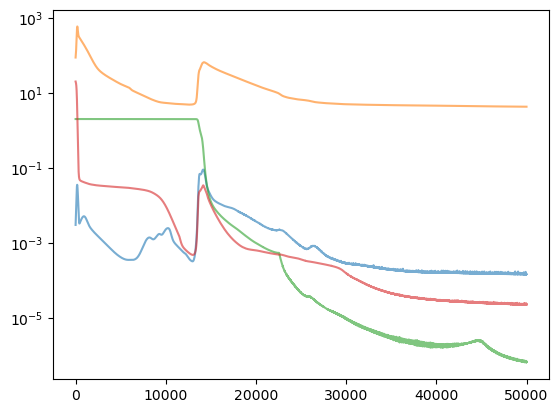

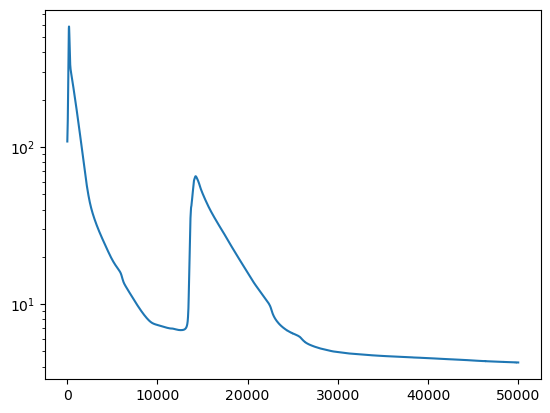

In [149]:

plt.plot(losses[0,:], alpha=.6)
plt.plot(losses[1,:], alpha=.6)
plt.plot(losses[2,:], alpha=.6)
plt.plot(losses[3,:], alpha=.6)
plt.yscale('log'); plt.show()
plt.plot(np.sum(losses, axis=0))
plt.yscale('log');plt.show()


In [132]:
def plot_surf(ax, X,Y, sol, scatter=False):    
    if scatter:
        ax.scatter(X,Y,sol, marker='.')
    else:
        ax.plot_surface(X,Y,sol)
    

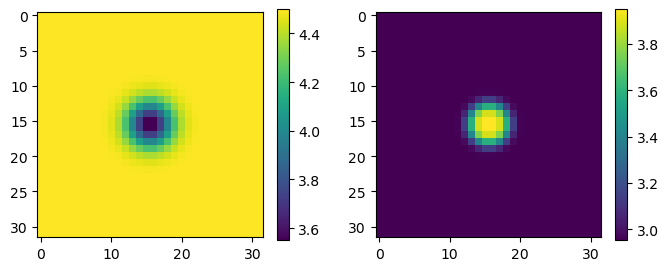

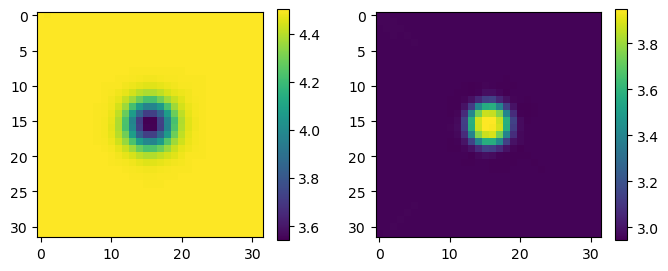

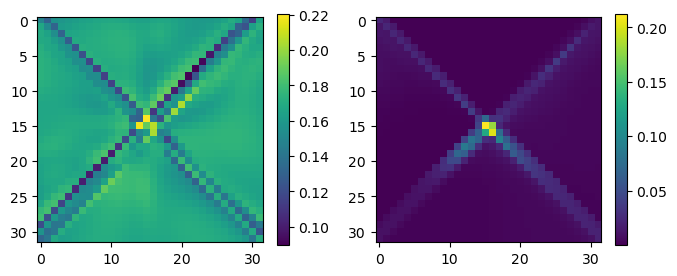

In [150]:
U_hat = Initial_U.cpu().detach().reshape((Ix,Iy))
V_hat = Initial_V.cpu().detach().reshape((Ix,Iy))
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(U_hat)
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(V_hat)
plt.colorbar(shrink=.75)
plt.show()


solution = model(physics_X).cpu().detach()
U_hat = solution[:Ix*Iy, 0].reshape((Ix,Iy))
V_hat = solution[:Ix*Iy, 1].reshape((Ix,Iy))
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(U_hat)
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(V_hat)
plt.colorbar(shrink=.75)
plt.show()
index = T_max
U_hat = solution[Ix*Iy*(index):Ix*Iy*(index+1), 0].reshape((Ix,Iy))
V_hat = solution[Ix*Iy*(index):Ix*Iy*(index+1), 1].reshape((Ix,Iy))
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(U_hat)
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(V_hat)
plt.colorbar(shrink=.75)
plt.show()

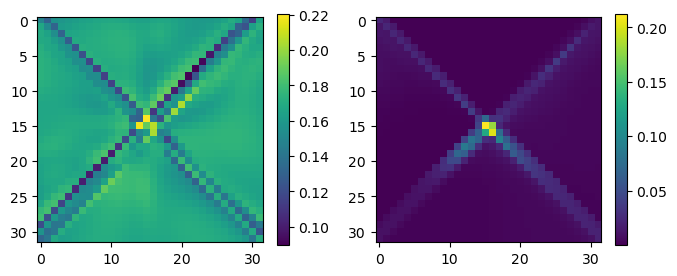

In [154]:
index = T_max
U_hat = solution[Ix*Iy*(index):Ix*Iy*(index+1), 0].reshape((Ix,Iy))
V_hat = solution[Ix*Iy*(index):Ix*Iy*(index+1), 1].reshape((Ix,Iy))
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(U_hat)
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(V_hat)
plt.colorbar(shrink=.75)
plt.show()

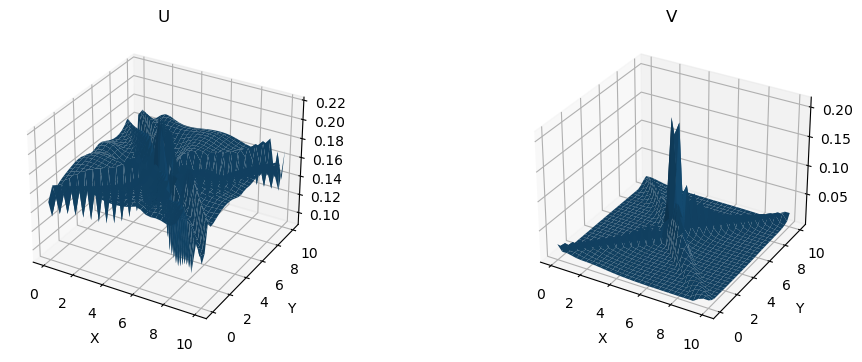

In [155]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1,projection='3d')

plot_surf(ax, physics_X[:Ix*Iy,0].cpu().detach().reshape((Ix,Iy)), 
          physics_X[:Ix*Iy,1].cpu().detach().reshape((Ix,Iy)),
          U_hat,
          scatter=False)
plt.title("U"); plt.xlabel("X"); plt.ylabel("Y")    

ax = fig.add_subplot(1,2,2,projection='3d')
plot_surf(ax, physics_X[:Ix*Iy,0].cpu().detach().reshape((Ix,Iy)), 
          physics_X[:Ix*Iy,1].cpu().detach().reshape((Ix,Iy)),
          V_hat,
          scatter=False)
plt.title("V"); plt.xlabel("X"); plt.ylabel("Y")    
plt.show()

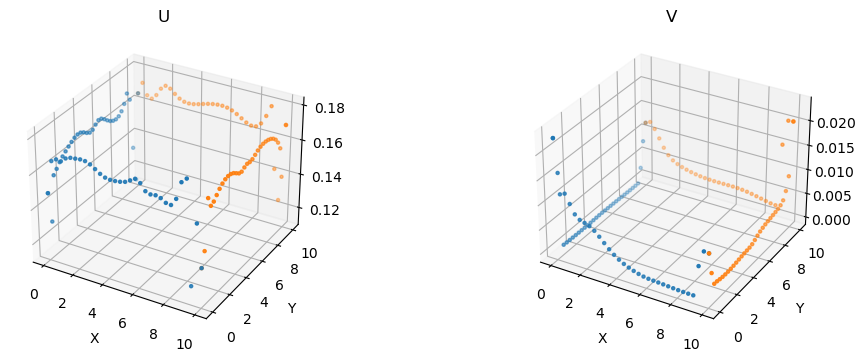

In [153]:
boundary_solution1 = model(boundary_X1).cpu().detach()
boundary_solution2 = model(boundary_X2).cpu().detach()
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1,projection='3d')

plot_surf(ax, 
          boundary_X1[-Ix-Iy:,0].cpu().detach(), 
          boundary_X1[-Ix-Iy:,1].cpu().detach(),
          boundary_solution1[-Ix-Iy:,0],
          scatter=True)
plot_surf(ax, 
          boundary_X2[-Ix-Iy:,0].cpu().detach(), 
          boundary_X2[-Ix-Iy:,1].cpu().detach(),
          boundary_solution2[-Ix-Iy:,0],
          scatter=True)
plt.title("U"); plt.xlabel("X"); plt.ylabel("Y")    

ax = fig.add_subplot(1,2,2,projection='3d')
plot_surf(ax, 
          boundary_X1[-Ix-Iy:,0].cpu().detach(), 
          boundary_X1[-Ix-Iy:,1].cpu().detach(),
          boundary_solution1[-Ix-Iy:,1],
          scatter=True)
plot_surf(ax, 
          boundary_X2[-Ix-Iy:,0].cpu().detach(), 
          boundary_X2[-Ix-Iy:,1].cpu().detach(),
          boundary_solution2[-Ix-Iy:,1],
          scatter=True)
plt.title("V"); plt.xlabel("X"); plt.ylabel("Y")    
plt.show()
